In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# umap
import umap

In [2]:
pca_model = pickle.load(open('pca_withtrans_clean_newdata.pkl', 'rb'))

In [3]:
data_dir_yt = "./youtube/data/"
data_dir_tt = "./tiktok-opinion-dynamics/src/tiktok_opinion_dynamics/data/search/creators/"

dictionary_channelid = {"unclimatechange": "UCuLEr-GWiwCBB6zBDX3elOQ",
                        #"natgeo": "UCpVm7bg6pXKo1Pr6k5kxG9A",
                        #"nbcnews": "UCeY0bbntWzzVIaj2z3QigXg",
                        "bbcnews": "UC16niRr50-MSBwiO3YDb3RA",
                        "climateadam": "UCCu5wtZ5uOWZp_roz7wHPfg",
                        "drgilbz": "UCjaBxCyjLpIRyKOd8uw_S4w",
                        "dwplaneta": "UCb72Gn5LXaLEcsOuPKGfQOg",
                        "extinctionrebellionxr": "UCYThdLKE6TDwBJh-qDC6ICA",
                        "greenpeace_international": "UCTDTSx8kbxGECZJxOa9mIKA",
                        "guardian": "UCHpw8xwDNhU9gdohEcJu4aA",
                        "ourchangingclimate": "UCNXvxXpDJXp-mZu3pFMzYHQ",
                        "ted": "UCAuUUnT6oDeKwE6v1NGQxug"} 

dictionary_channelid_2 = {"juststopoil": "UC-t4U1Azf8AOkCBJILSNBmw",
                        "minuteearth": "UCeiYXex_fwgYDonaTcSIk6w",
                        "metoffices": "UC40Tw2tFuMzK305mi7nj8rg",
                        "zahrabiabani": "UCuRimTRSnyVlSrN4aQVCCkA",   
                        #"declareemergency": "UCi2pVvNv5s_Nh4KipoGQXxQ",
                        #"thereviveseries": "UCvpfvQqheuQRZiVjiSh71sw",
                        #"climatt": "UCoSRNBi6F4jN0CYq-sRcOHQ",
                        "rupertread": "UCm7-jS-VzbR3xEqpBGYDPcQ",
                        "friendsoftheearth": "UC9qqyIuIUoRKTG6sE5rVlhg",
                        "parleychannel": "UCieB62vq-5QByMIcq-LMntg",
                        "actionfortheclimate": "UCbewlkCKbV1B3xmKwXa1qsA",
                        "piqueaction": "UCNf0NVrB9U8YF5sFpbsME4A",
                        "margreen": "UCUDFVYGkosHtan3lGnQttew",
                        "nowthisearth": "UCFH5dQAkGIqzcFYmM4tNtXw"}  

# merge dictionaries
dictionary_channelid.update(dictionary_channelid_2) 

In [4]:
emb_all_tt = []
emb_all_yt = []
content_all_tt = []
content_all_yt = []

for creator in dictionary_channelid.keys():
    print("Creator:", creator)

    # load embeddings content
    with open("./embeddings/embeddings_tt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_tt_content = pickle.load(f)
    
    emb_all_tt.append(embeddings_tt_content)

    # load content TT all_keywords
    with open(data_dir_tt+"all_keywords_"+creator+"_2021-2023.pkl", "rb") as f:
        tt_content = pickle.load(f)
    content_all_tt.append(tt_content)

    with open("./embeddings/embeddings_subset/embeddings_yt_withtrans_clean_"+creator+"_newdata.pkl", "rb") as f:
        embeddings_yt_content = pickle.load(f)

    emb_all_yt.append(embeddings_yt_content)

    # load content YT all_keywords
    with open(data_dir_yt+creator+"_transcript_2021-2023_newkeys.pkl", "rb") as f:
        yt_content = pickle.load(f)
    content_all_yt.append(yt_content)

emb_all_tt = np.vstack(emb_all_tt)
emb_all_yt = np.vstack(emb_all_yt)

# concatenate all content
content_all_tt = pd.concat(content_all_tt)
# reset index
content_all_tt.reset_index(drop=True, inplace=True)
content_all_yt = pd.concat(content_all_yt)
# reset index
content_all_yt.reset_index(drop=True, inplace=True)



Creator: unclimatechange
Creator: bbcnews
Creator: climateadam
Creator: drgilbz
Creator: dwplaneta
Creator: extinctionrebellionxr
Creator: greenpeace_international
Creator: guardian
Creator: ourchangingclimate
Creator: ted
Creator: juststopoil
Creator: minuteearth
Creator: metoffices
Creator: zahrabiabani
Creator: rupertread
Creator: friendsoftheearth
Creator: parleychannel
Creator: actionfortheclimate
Creator: piqueaction
Creator: margreen
Creator: nowthisearth


## PCA

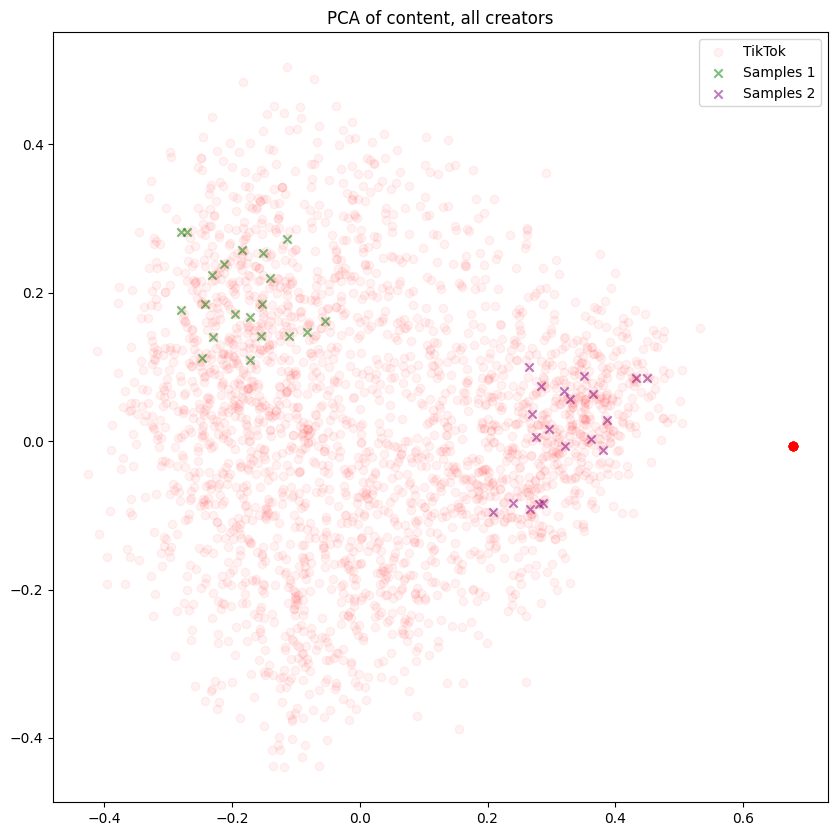

In [94]:
# apply PCA to embeddings
emb_all_tt_pca = pca_model.transform(emb_all_tt)
emb_all_yt_pca = pca_model.transform(emb_all_yt)

# plot PCA
plt.figure(figsize=(10,10))
plt.scatter(emb_all_tt_pca[:,0], emb_all_tt_pca[:,1], label="TikTok", color="red", alpha=0.05)
#plt.scatter(emb_all_yt_pca[:,0], emb_all_yt_pca[:,1], label="YouTube", color="blue", alpha=0.1)

# sample 2 data points with PC1 around -0.2 and PC2 around 0.2
samples1 = np.where((emb_all_tt_pca[:,0] > -0.3) & (emb_all_tt_pca[:,0] < -0.05) & (emb_all_tt_pca[:,1] > 0.1) & (emb_all_tt_pca[:,1] < 0.3))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples1 = np.random.choice(samples1, 20, replace=False)
# extract samples from content_all_yt
samples1_content = content_all_tt.iloc[samples1]
# color samples in plot 
plt.scatter(emb_all_tt_pca[samples1,0], emb_all_tt_pca[samples1,1], label="Samples 1", color="green", alpha=0.5, marker="x")

# sample 2 data points with PC1 around 0.4 and PC2 around 0.05
samples2 = np.where((emb_all_tt_pca[:,0] > 0.2) & (emb_all_tt_pca[:,0] < 0.45) & (emb_all_tt_pca[:,1] > -0.1) & (emb_all_tt_pca[:,1] < 0.1))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples2 = np.random.choice(samples2, 20, replace=False)
# extract samples from content_all_yt
samples2_content = content_all_tt.iloc[samples2]
# color samples in plot 
plt.scatter(emb_all_tt_pca[samples2,0], emb_all_tt_pca[samples2,1], label="Samples 2", color="purple", alpha=0.5, marker="x")


# title
plt.title("PCA of content, all creators")
plt.legend()

plt.show()

In [95]:
# print in a nice way the text of the samples
print("Samples 1:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if type(samples1_content.iloc[i]["voice_to_text"]) == str:
        print("Sample", i+1, ":", samples1_content.iloc[i]["voice_to_text"])
    else:
        print("Sample", i+1, ":", samples1_content.iloc[i]["video_description"])

print("")
print("Samples 1:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if type(samples2_content.iloc[i]["voice_to_text"]) == str:
        print("Sample", i+1, ":", samples2_content.iloc[i]["voice_to_text"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])


Samples 1:
Sample 1 : How global warming will impact sea levels around the world climatechange
Sample 2 : I don't want to cause disruption, but I don't feel like I have any option. things are really bad with the climate and governments have not been listening to scientists for over 30 years now. and we're out of time. ordinary people are really suffering at the moment with the cost of living crisis and the energy crisis. 40 degree heat in this country this summer, the worst drought in 500 years in Europe. rivers drying up left, right and centre. birds were falling dead out of the sky in India and Pakistan earlier this year. now 1/3 of Pakistan's underwater. 33 3 million people have been displaced. thousands are dying every day as a direct result of climate change in our government and governments around the world. inability or lack of will to deal with it. and I can't stand by any longer. let this happen. and we've tried everything. we tried writing polite letters to the newspapers, ta

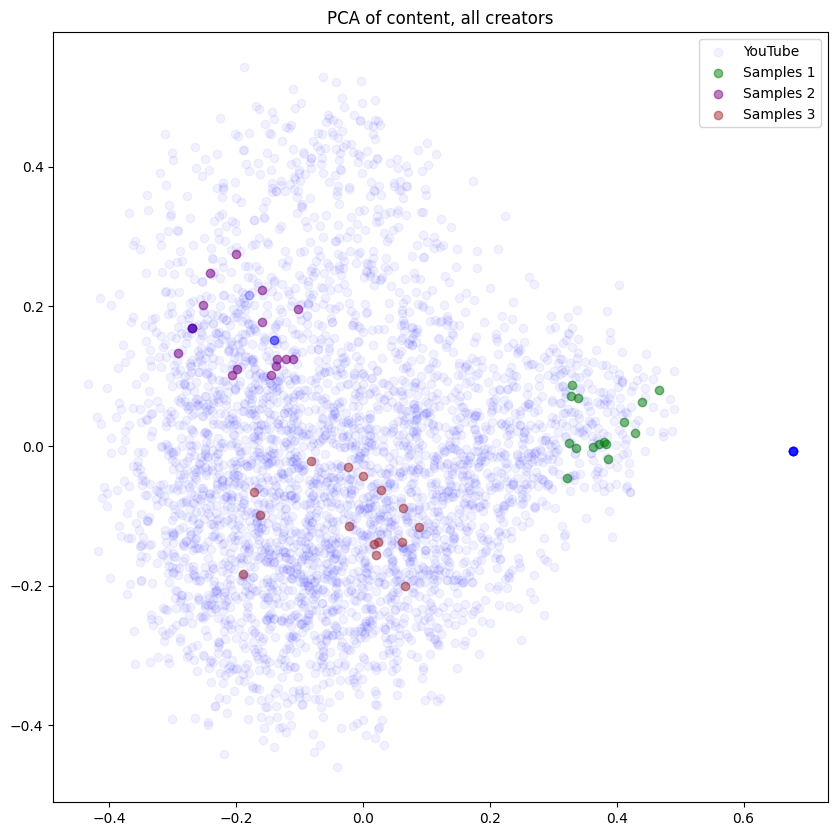

In [97]:
# apply PCA to embeddings
emb_all_tt_pca = pca_model.transform(emb_all_tt)
emb_all_yt_pca = pca_model.transform(emb_all_yt)

# plot PCA
plt.figure(figsize=(10,10))
#plt.scatter(emb_all_tt_pca[:,0], emb_all_tt_pca[:,1], label="TikTok", color="red", alpha=0.1)
plt.scatter(emb_all_yt_pca[:,0], emb_all_yt_pca[:,1], label="YouTube", color="blue", alpha=0.05)

#sample 2 data points with PC1 around -0.2 and PC2 around 0.2
samples1 = np.where((emb_all_yt_pca[:,0] > 0.3) & (emb_all_yt_pca[:,0] < 0.5) & (emb_all_yt_pca[:,1] > -0.1) & (emb_all_yt_pca[:,1] < 0.1))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples1 = np.random.choice(samples1, 15, replace=False)
# extract samples from content_all_yt
samples1_content = content_all_yt.iloc[samples1]
# color samples in plot 
plt.scatter(emb_all_yt_pca[samples1,0], emb_all_yt_pca[samples1,1], label="Samples 1", color="green", alpha=0.5)

# sample 2 data points with PC1 around 0.4 and PC2 around 0.05
samples2 = np.where((emb_all_yt_pca[:,0] > -0.3) & (emb_all_yt_pca[:,0] < -0.1) & (emb_all_yt_pca[:,1] > 0.1) & (emb_all_yt_pca[:,1] < 0.3))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples2 = np.random.choice(samples2, 15, replace=False)
# extract samples from content_all_yt
samples2_content = content_all_yt.iloc[samples2]
# color samples in plot 
plt.scatter(emb_all_yt_pca[samples2,0], emb_all_yt_pca[samples2,1], label="Samples 2", color="purple", alpha=0.5)


# sample 3 data points with PC1 around 0.4 and PC2 around 0.05
samples3 = np.where((emb_all_yt_pca[:,0] > -0.2) & (emb_all_yt_pca[:,0] < 0.1) & (emb_all_yt_pca[:,1] > -0.2) & (emb_all_yt_pca[:,1] < 0))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples3 = np.random.choice(samples3, 15, replace=False)
# extract samples from content_all_yt
samples3_content = content_all_yt.iloc[samples3]
# color samples in plot 
plt.scatter(emb_all_yt_pca[samples3,0], emb_all_yt_pca[samples3,1], label="Samples 3", color="brown", alpha=0.5)



# title
plt.title("PCA of content, all creators")
plt.legend()

plt.show()

In [98]:
# print in a nice way the text of the samples
print("Samples 1:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if type(samples1_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Description"])

print("")
print("Samples 2:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if type(samples2_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples2_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["Video Description"])


print("")
print("Samples 3:")
for i in range(len(samples3_content)):
    # type voice_to_text is not string
    if type(samples3_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples3_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples3_content.iloc[i]["Video Description"])



Samples 1:
Sample 1 :  Check it for you right now. Check it for you right now. Check it for you right now.
Sample 2 : what do you mean my cards been declined.try it again bu.meag
Sample 3 :  A sua pessoa achava que se derrubasse todas as árvores, era um benefício para criar os animais. O que fazer para você ter o plantio, criar os animais e não derrubar as árvores, não destruir com a natureza. O que fazer para você ter o plantio, é um almoço. O que fazer para você ter o plantio, é um almoço. O que fazer para você ter o plantio, é um almoço. O que fazer para você ter o plantio, é um almoço. O que fazer para você ter o plantio, é um almoço. Música Como é só pequena, manual, mas nunca imaginou que ela ia crescer tanto. No caso, o humbo mesmo, a POPA, o benefício que trouxe para mim e para a comunidade foi uma renda a mais. O humbo hoje é um caminho para restaurar a floresta e hoje quem não tem na sua propriedade quer ter um pedi humbo. Porque a gente que tem, ela tem um pedi de ero verde.

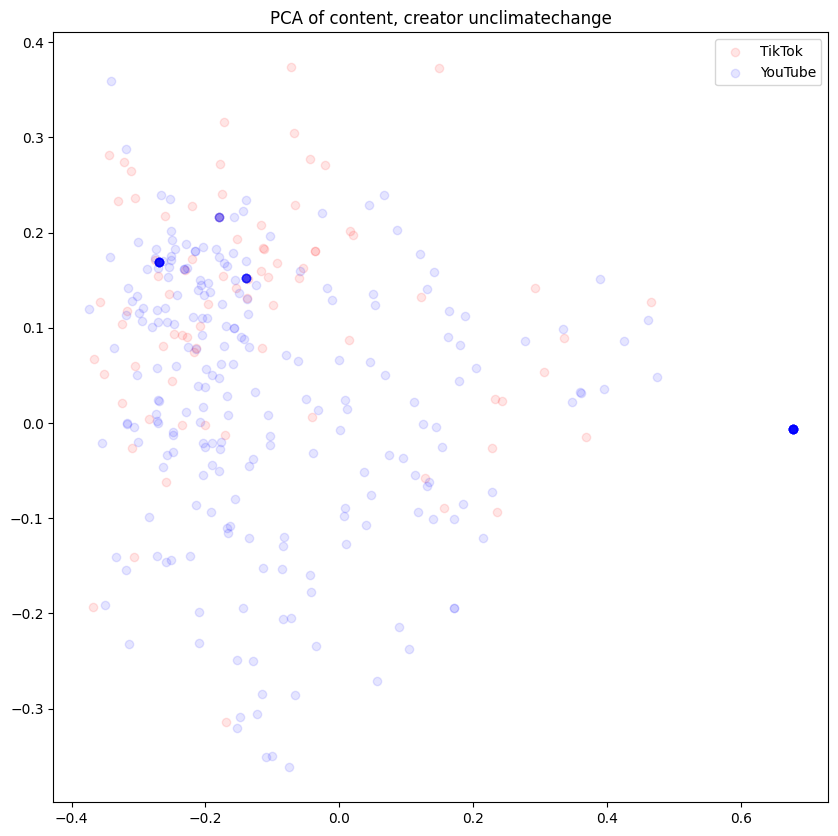

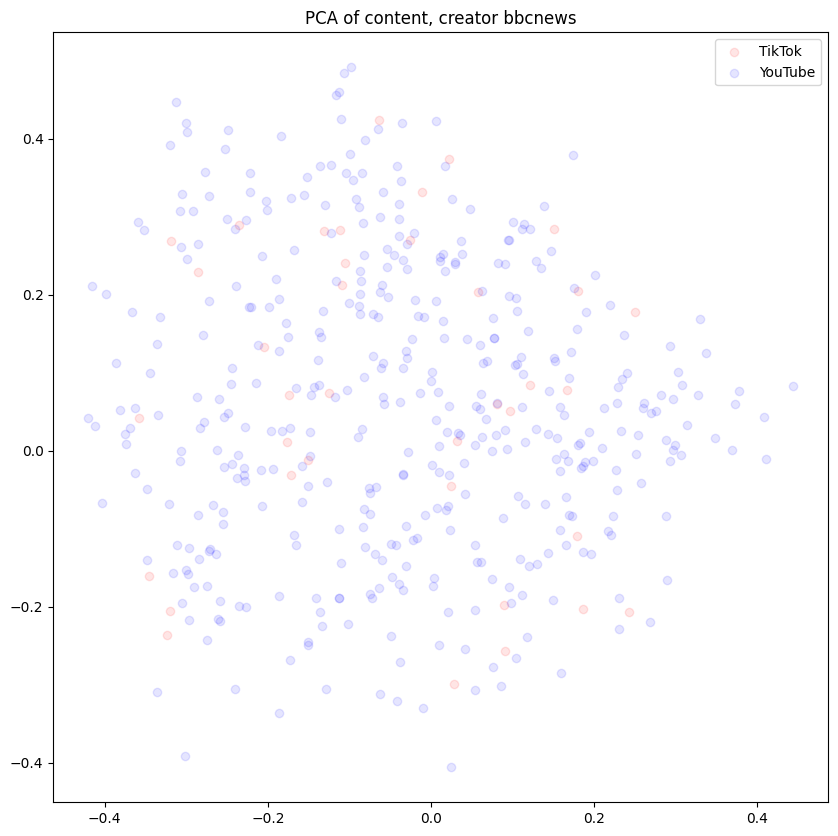

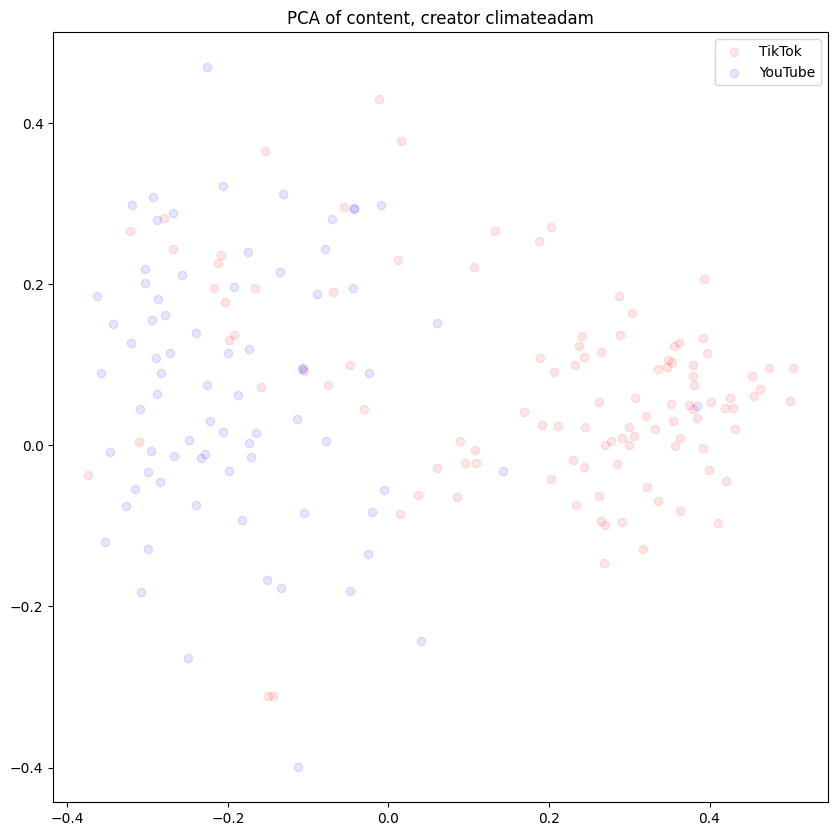

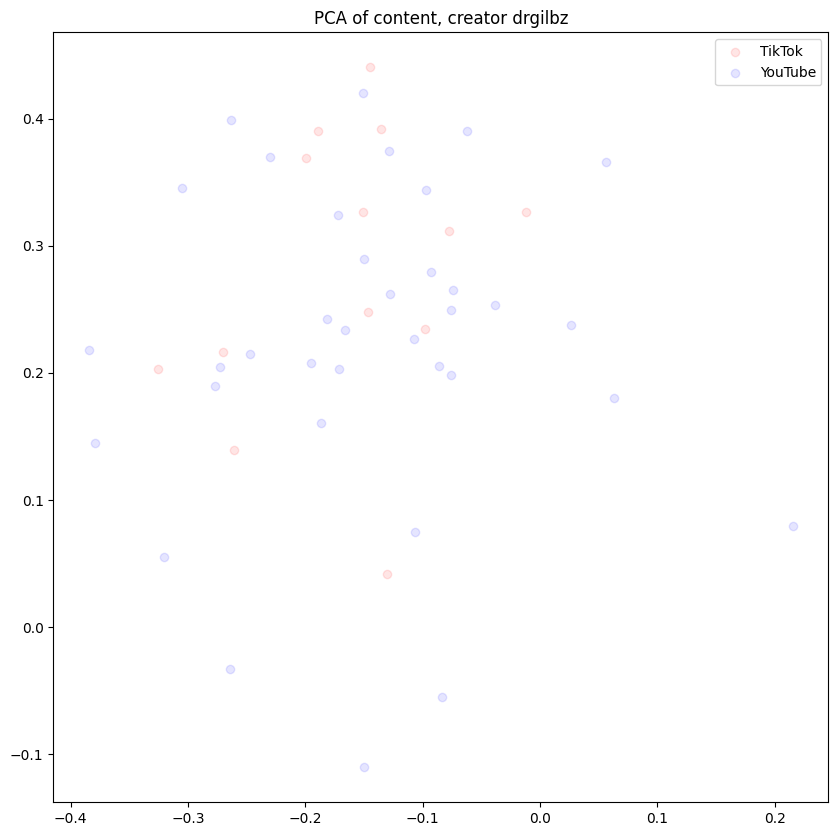

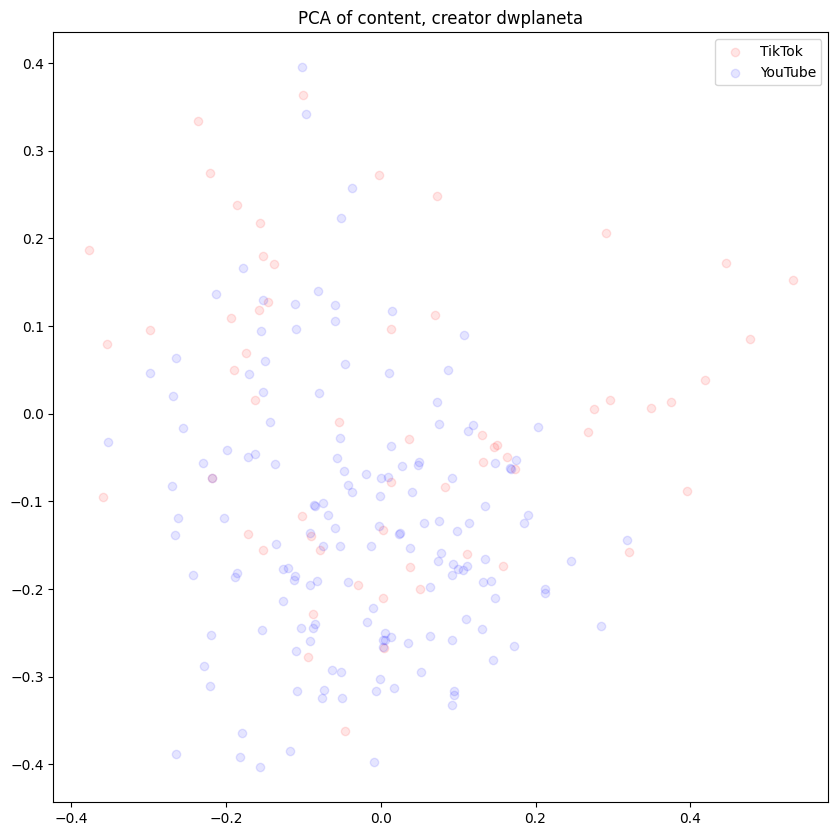

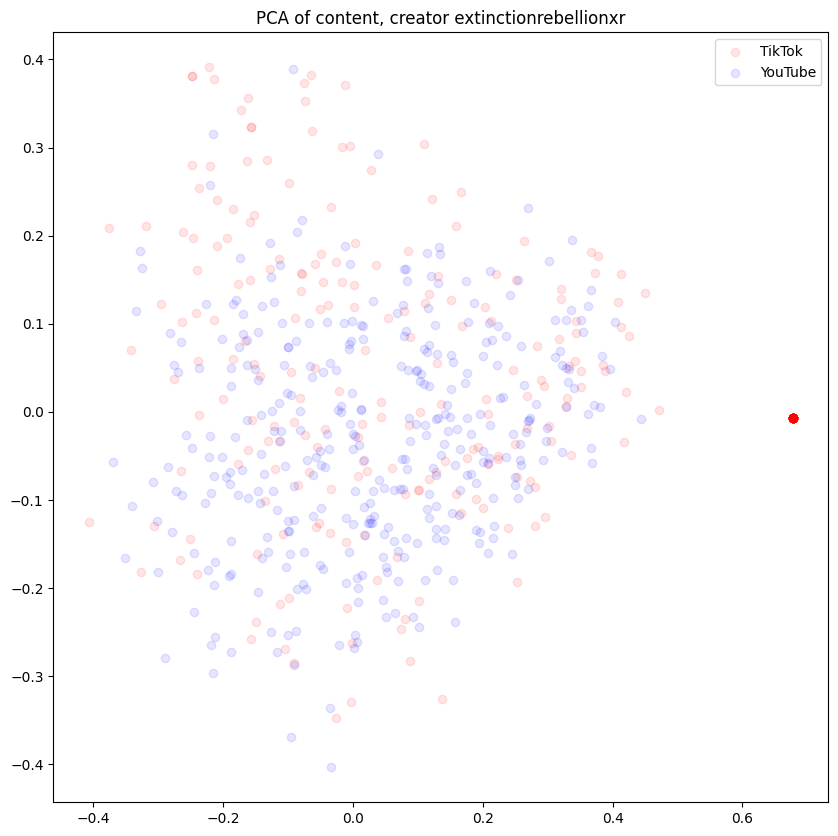

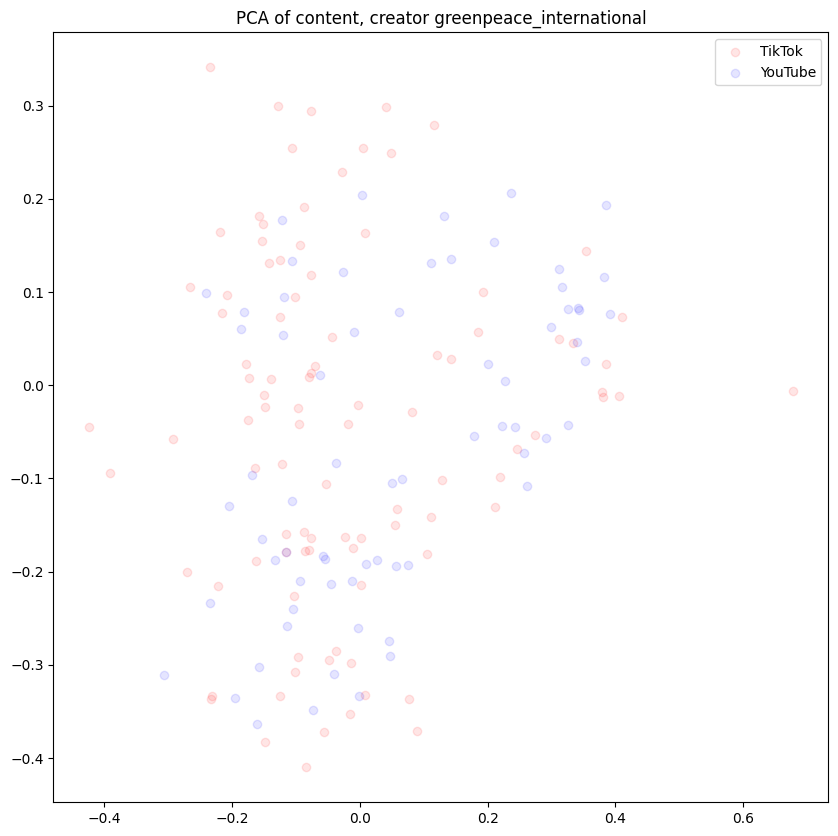

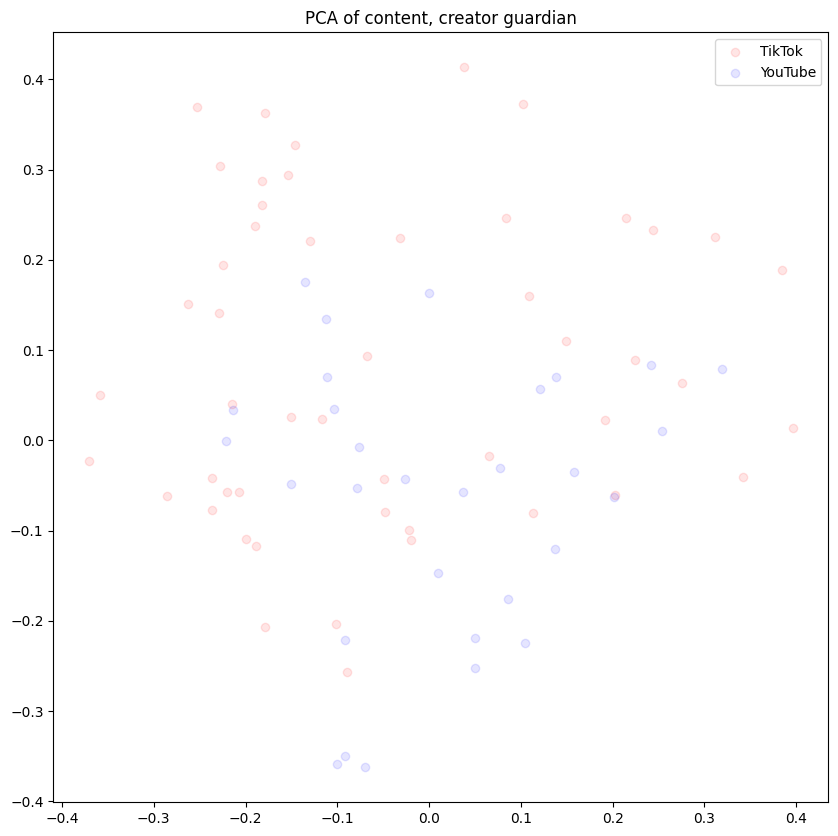

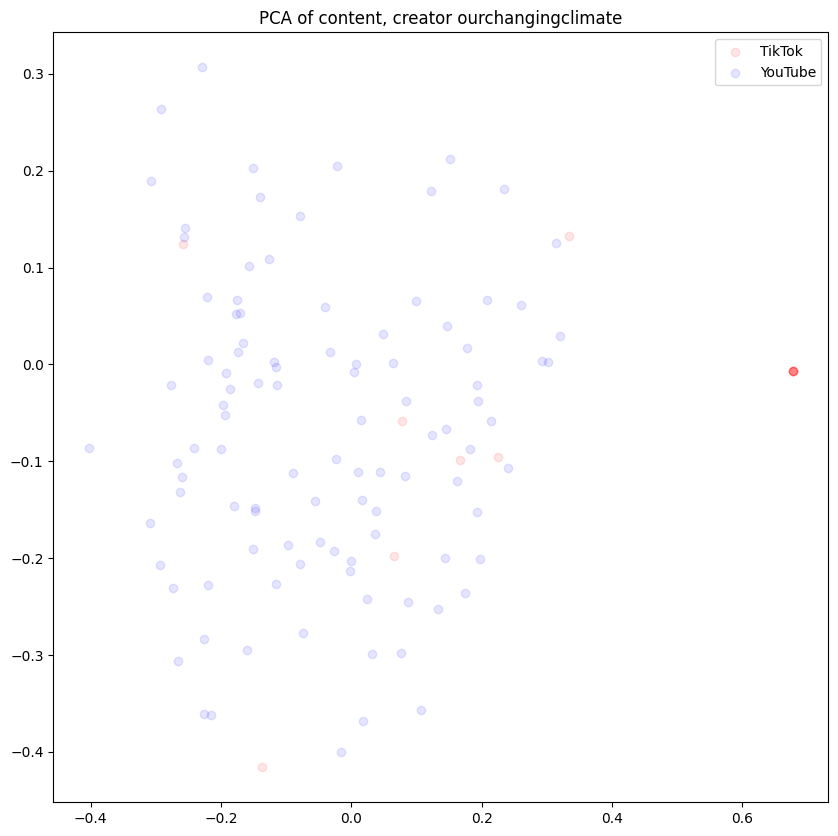

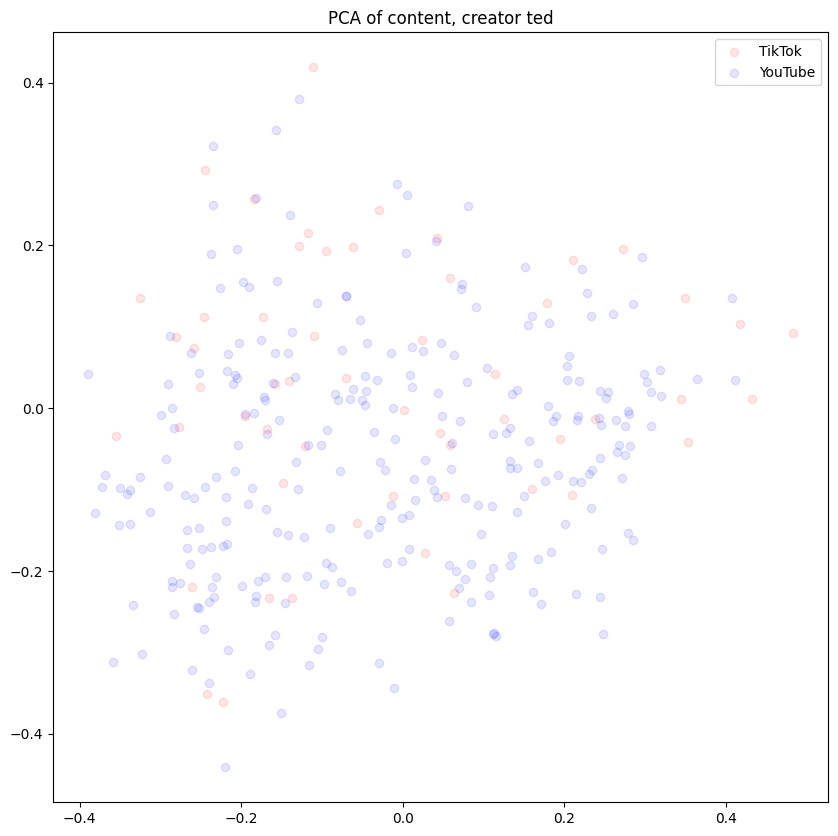

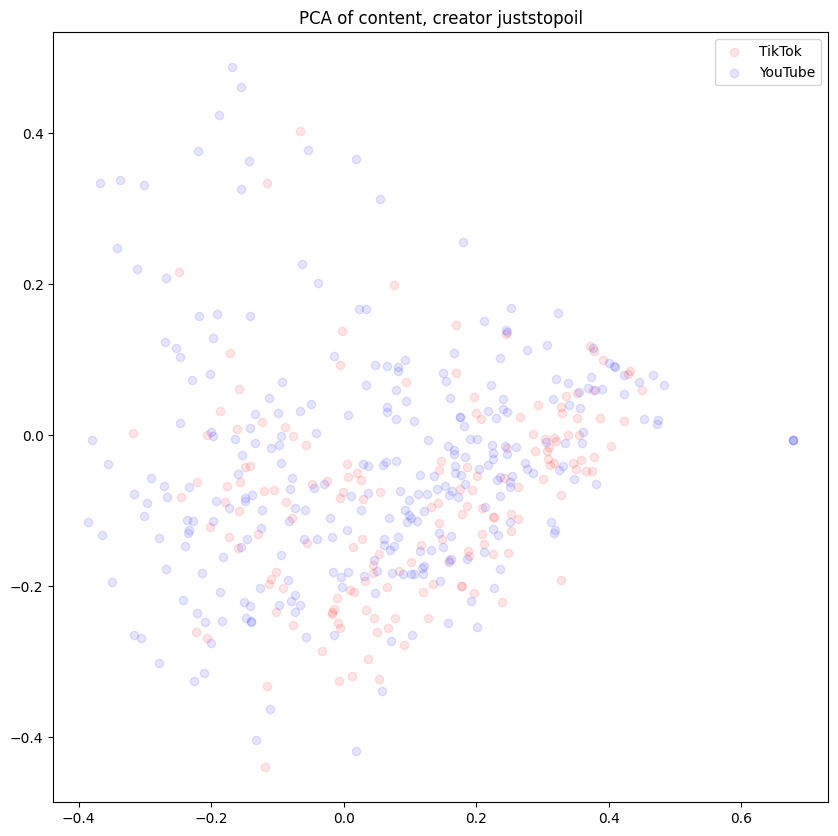

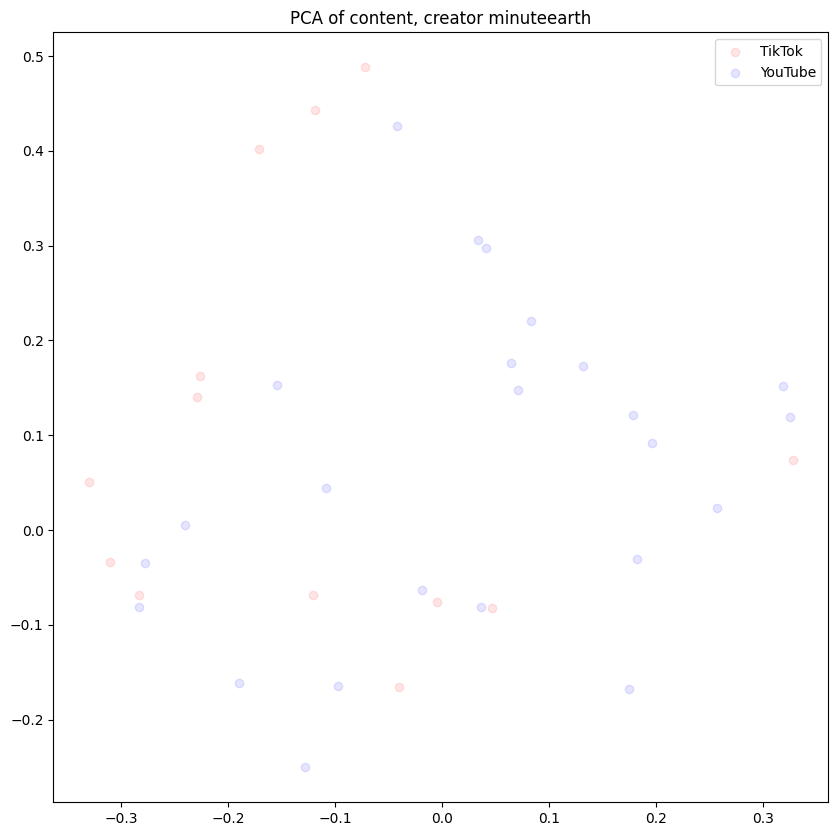

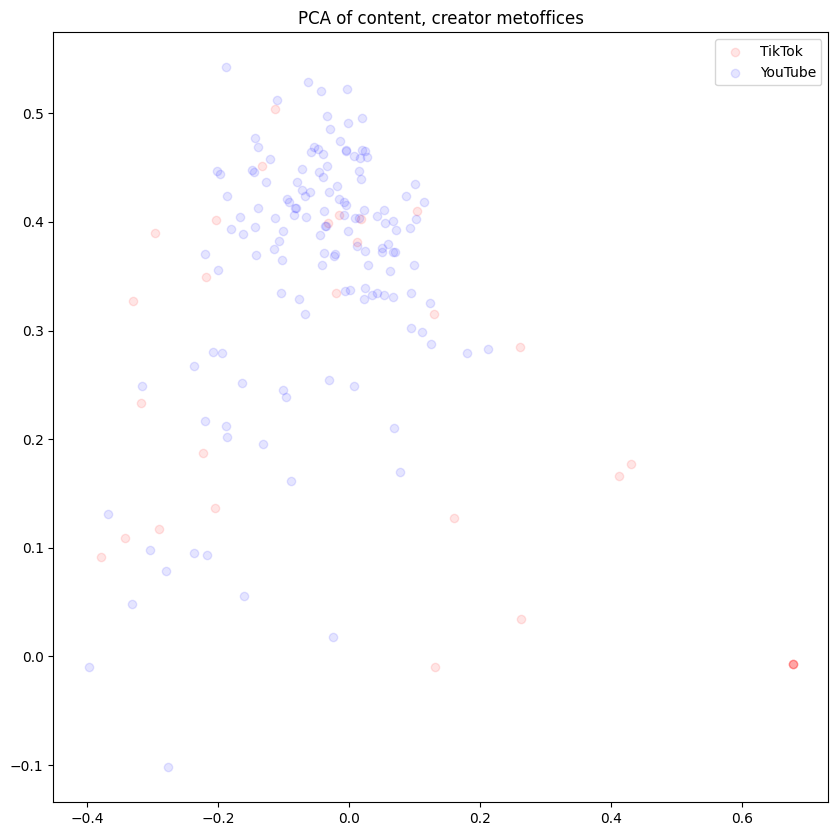

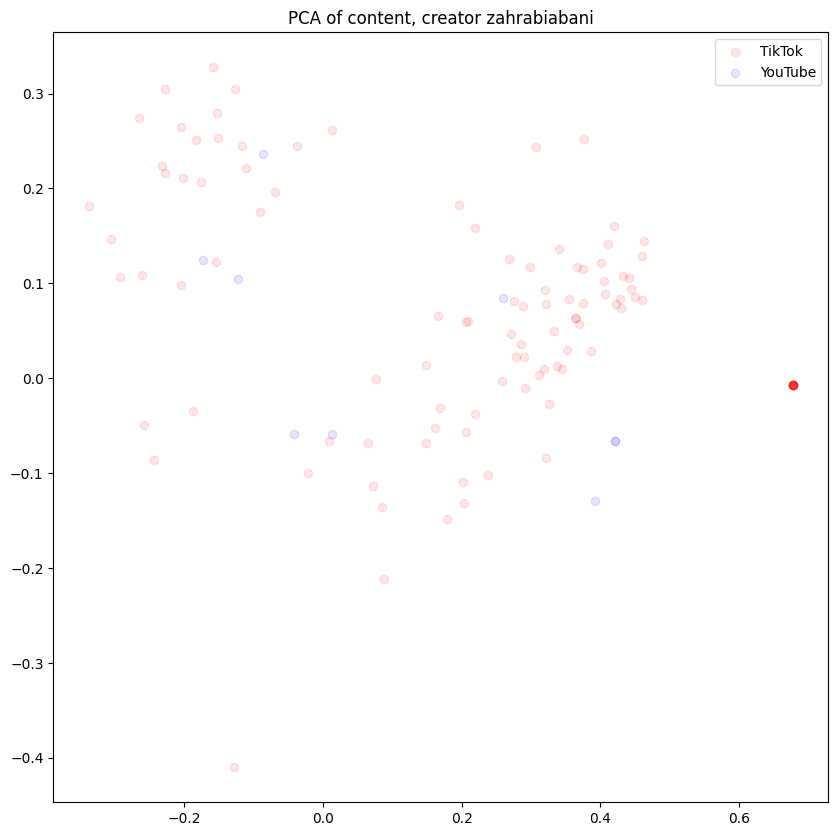

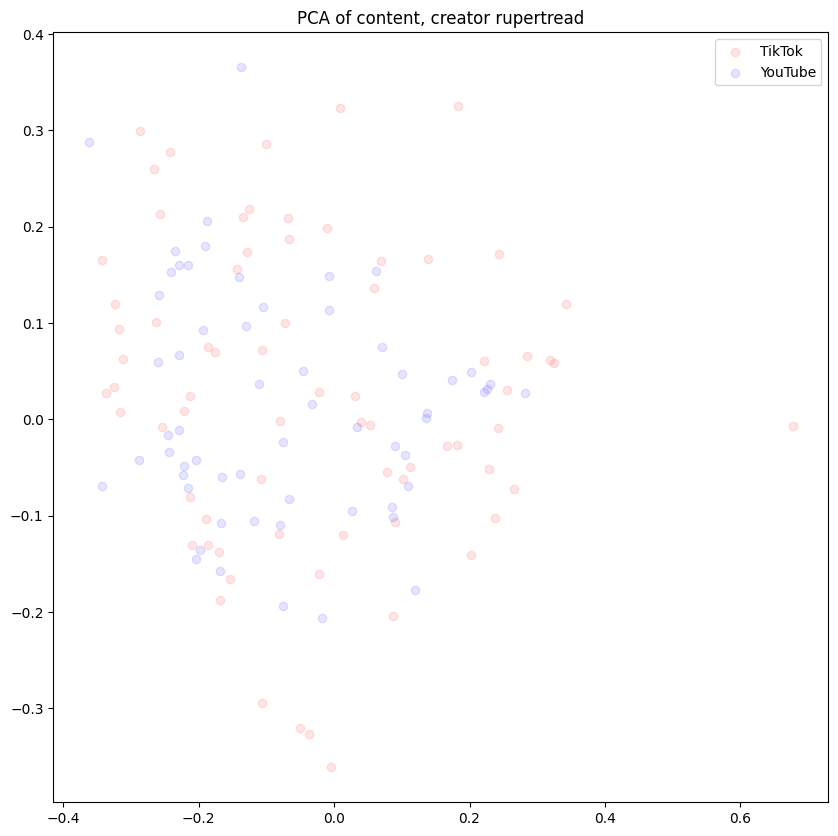

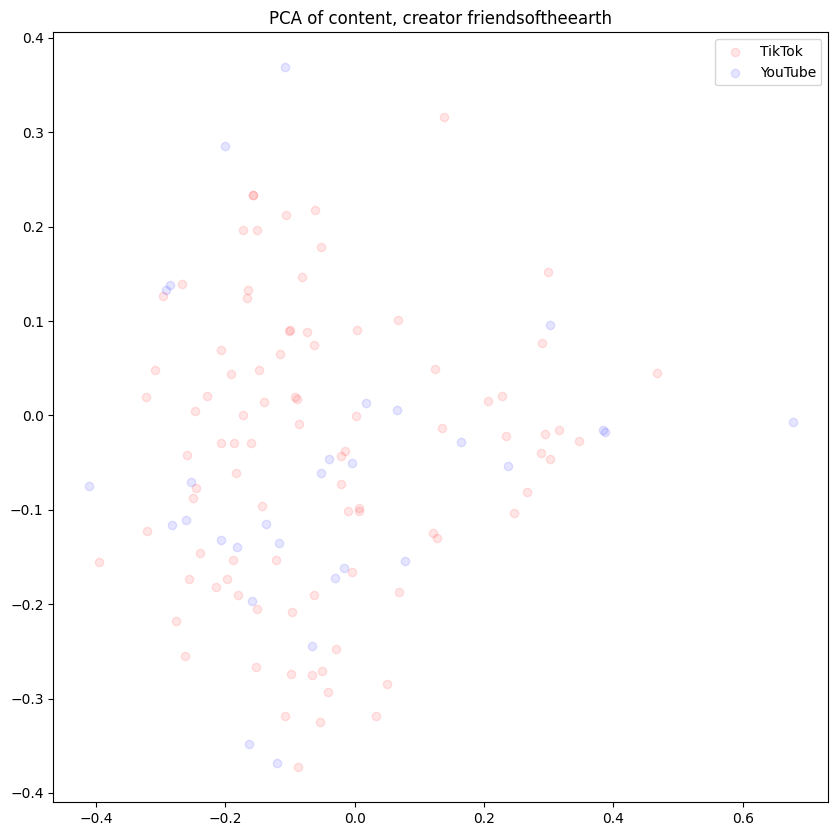

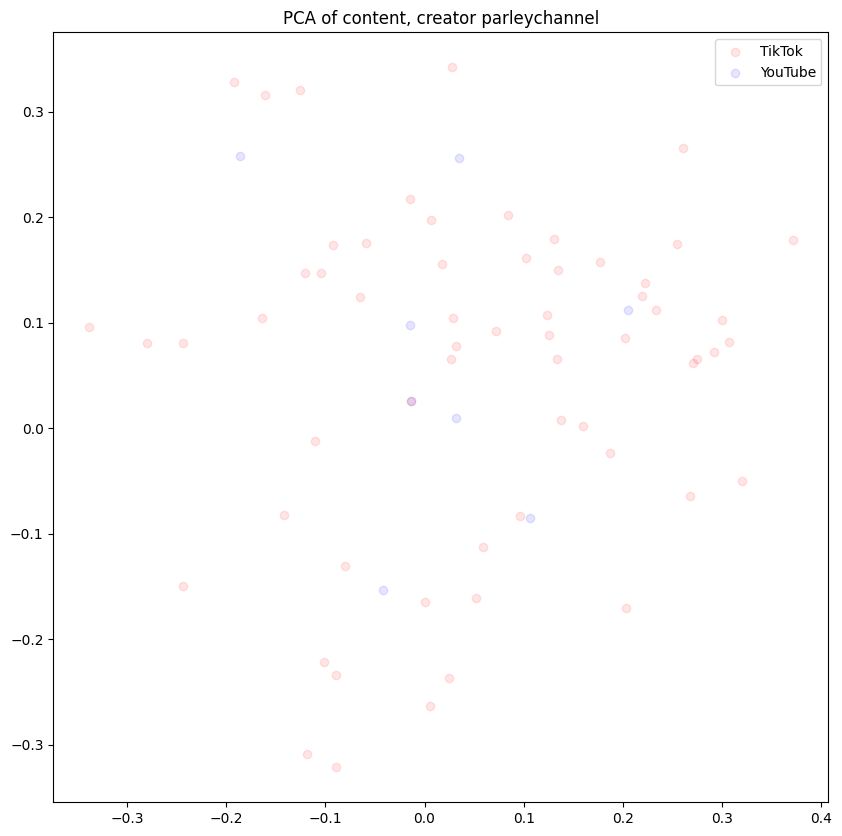

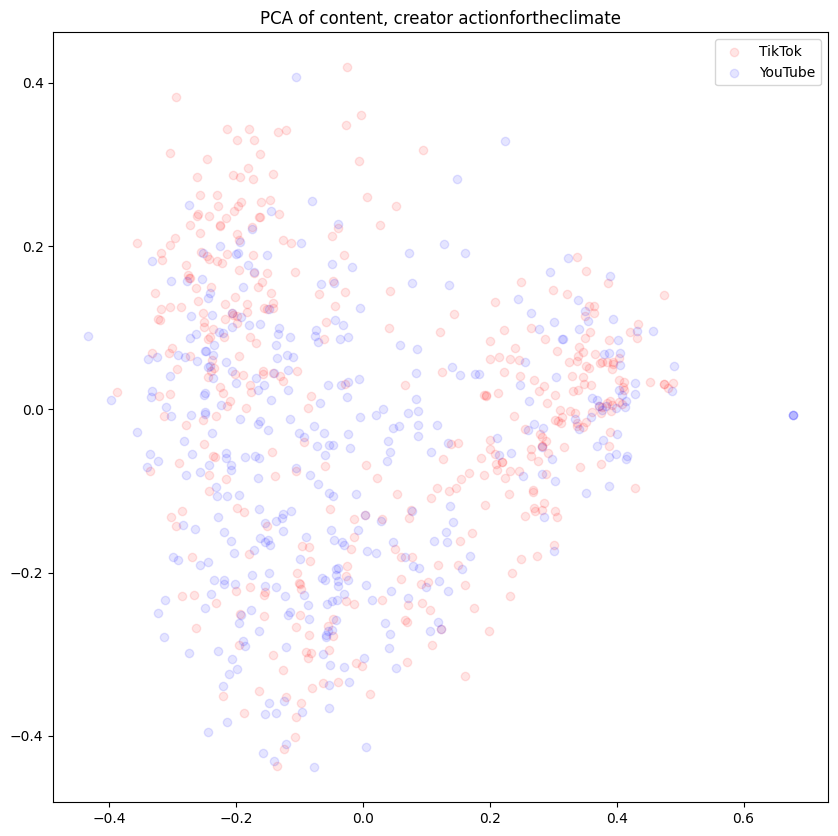

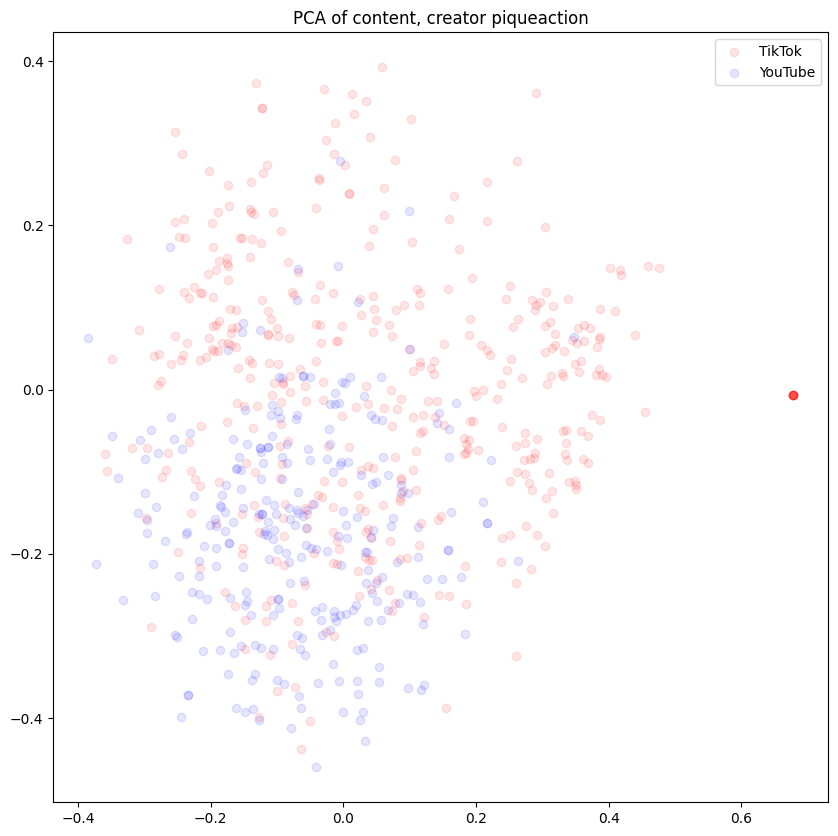

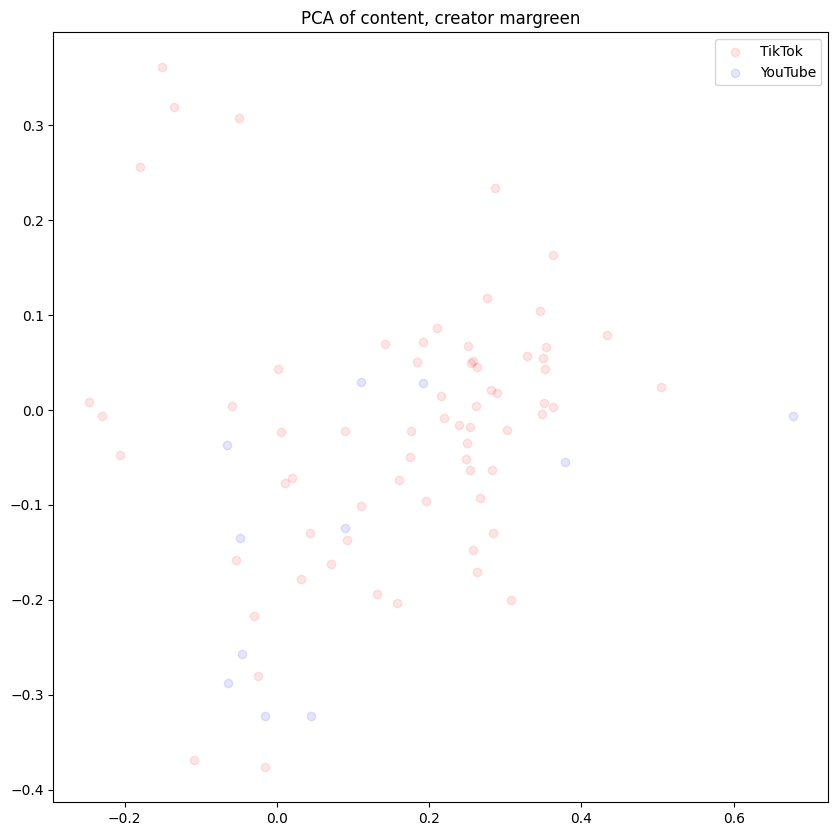

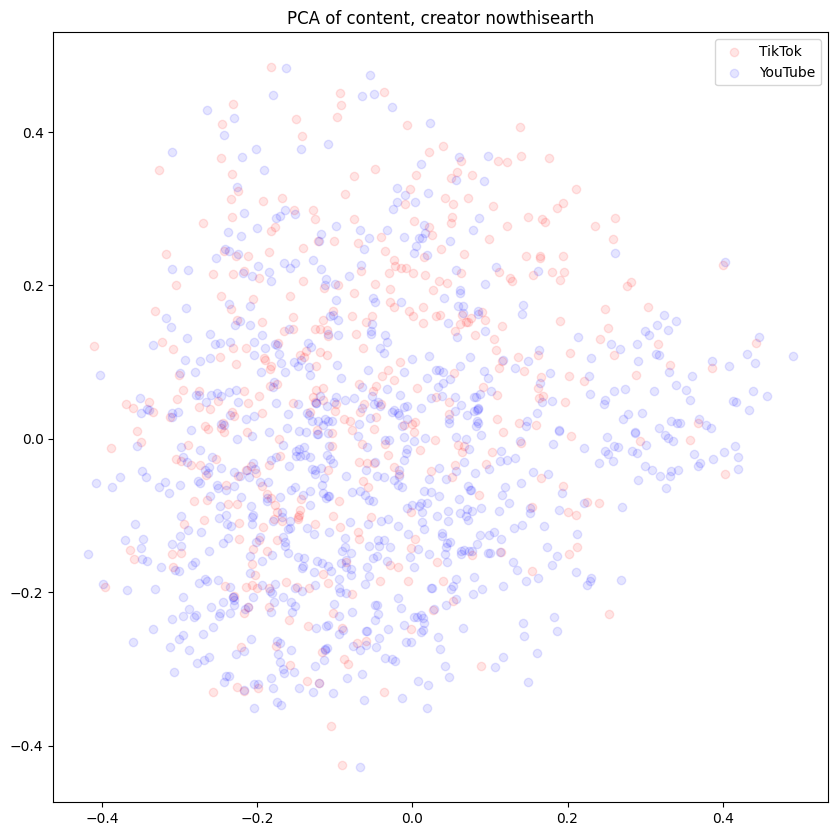

In [99]:
# for each creator, plot PCA
for creator in dictionary_channelid.keys():
    # load embeddings content
    with open("./embeddings/embeddings_tt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_tt_content = pickle.load(f)

    with open("./embeddings/embeddings_yt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_yt_content = pickle.load(f)

    # apply PCA to embeddings
    emb_tt_pca = pca_model.transform(embeddings_tt_content)
    emb_yt_pca = pca_model.transform(embeddings_yt_content)

    # plot PCA
    plt.figure(figsize=(10,10))
    plt.scatter(emb_tt_pca[:,0], emb_tt_pca[:,1], label="TikTok", color="red", alpha=0.1)
    plt.scatter(emb_yt_pca[:,0], emb_yt_pca[:,1], label="YouTube", color="blue", alpha=0.1)
    # title
    plt.title("PCA of content, creator "+creator)
    plt.legend()

    plt.show()

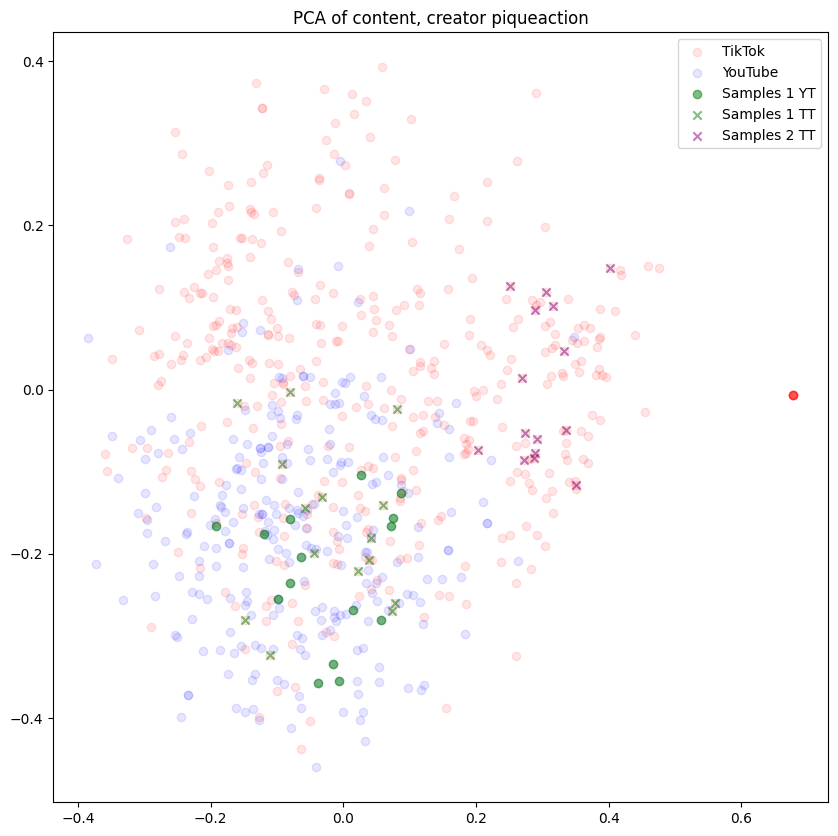

In [101]:
# climate adam

# for each creator, plot PCA
for creator in ["piqueaction"]:
    # load embeddings content
    with open("./embeddings/embeddings_tt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_tt_content = pickle.load(f)

    with open("./embeddings/embeddings_yt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_yt_content = pickle.load(f)

    # load content TT all_keywords
    with open(data_dir_tt+"all_keywords_"+creator+"_2021-2023.pkl", "rb") as f:
        tt_content = pickle.load(f)
        # reset index
        tt_content.reset_index(drop=True, inplace=True)

    # load content YT all_keywords
    with open(data_dir_yt+creator+"_transcript_2021-2023.pkl", "rb") as f:
        yt_content = pickle.load(f)
        # reset index
        yt_content.reset_index(drop=True, inplace=True)

    # apply PCA to embeddings
    emb_tt_pca = pca_model.transform(embeddings_tt_content)
    emb_yt_pca = pca_model.transform(embeddings_yt_content)

    # plot PCA
    plt.figure(figsize=(10,10))
    plt.scatter(emb_tt_pca[:,0], emb_tt_pca[:,1], label="TikTok", color="red", alpha=0.1)
    plt.scatter(emb_yt_pca[:,0], emb_yt_pca[:,1], label="YouTube", color="blue", alpha=0.1)

    #sample 2 data points with PC1 around -0.2 and PC2 around 0.2
    samples1 = np.where((emb_yt_pca[:,0] > -0.2) & (emb_yt_pca[:,0] < 0.1) & (emb_yt_pca[:,1] > -0.4) & (emb_yt_pca[:,1] < 0))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples1 = np.random.choice(samples1, 15, replace=False)
    # extract samples from content_all_yt
    samples1_content = yt_content.iloc[samples1]
    # color samples in plot 
    plt.scatter(emb_yt_pca[samples1,0], emb_yt_pca[samples1,1], label="Samples 1 YT", color="green", alpha=0.5)

    samples1tt = np.where((emb_tt_pca[:,0] > -0.2) & (emb_tt_pca[:,0] < 0.1) & (emb_tt_pca[:,1] > -0.4) & (emb_tt_pca[:,1] < 0))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples1tt = np.random.choice(samples1tt, 15, replace=False)
    # extract samples from content_all_yt
    samples1_content_tt = tt_content.iloc[samples1tt]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples1tt,0], emb_tt_pca[samples1tt,1], label="Samples 1 TT", color="green", alpha=0.5, marker="x")

    # sample 2 data points with PC1 around 0.4 and PC2 around 0.05
    samples2 = np.where((emb_tt_pca[:,0] > 0.2) & (emb_tt_pca[:,0] < 0.5) & (emb_tt_pca[:,1] > -0.2) & (emb_tt_pca[:,1] < 0.2))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples2 = np.random.choice(samples2, 15, replace=False)
    # extract samples from content_all_yt
    samples2_content = tt_content.iloc[samples2]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples2,0], emb_tt_pca[samples2,1], label="Samples 2 TT", color="purple", alpha=0.5, marker="x")

    # title
    plt.title("PCA of content, creator "+creator)
    plt.legend()

    plt.show()

In [102]:
# print in a nice way the text of the samples
print("Samples 1 YT:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if type(samples1_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Description"])

print("")
print("Samples 1 TT:")
for i in range(len(samples1_content_tt)):
    if "voice_to_text" in samples1_content_tt.columns:
        if type(samples1_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples1_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples1_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples1_content_tt.iloc[i]["video_description"])

print("")
print("")
print("Samples 2 TT:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples2_content.columns:
        if type(samples2_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples2_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])



Samples 1 YT:
Sample 1 : burning trees to help the environment.seems counterproductive right wrong it.can actually be good in some.circumstances and one of those.circumstances is biochar biochar is a.charcoal-like substance made from.biomass sources like trees wood chips.leafs and other plant residues that.would have otherwise been thrown away.it's created using a process known as.paralysis which is where you burn things.in the absence of oxygen adding biochar.to soil helps improve soil health and.crop yields as well as store the carbon.that would have otherwise been released.into the atmosphere when the biomass.decomposes creating biochar isn't a new.technique though it's been used as a.traditional agricultural practice in the.amazon basin for over 2500 years but.it's now seen as a climate solution.since studies have shown that producing.biochar can absorb 0.95 metric tons of.carbon dioxide per metric ton of biomass.used so next time somebody asks about.burning trees you can tell them

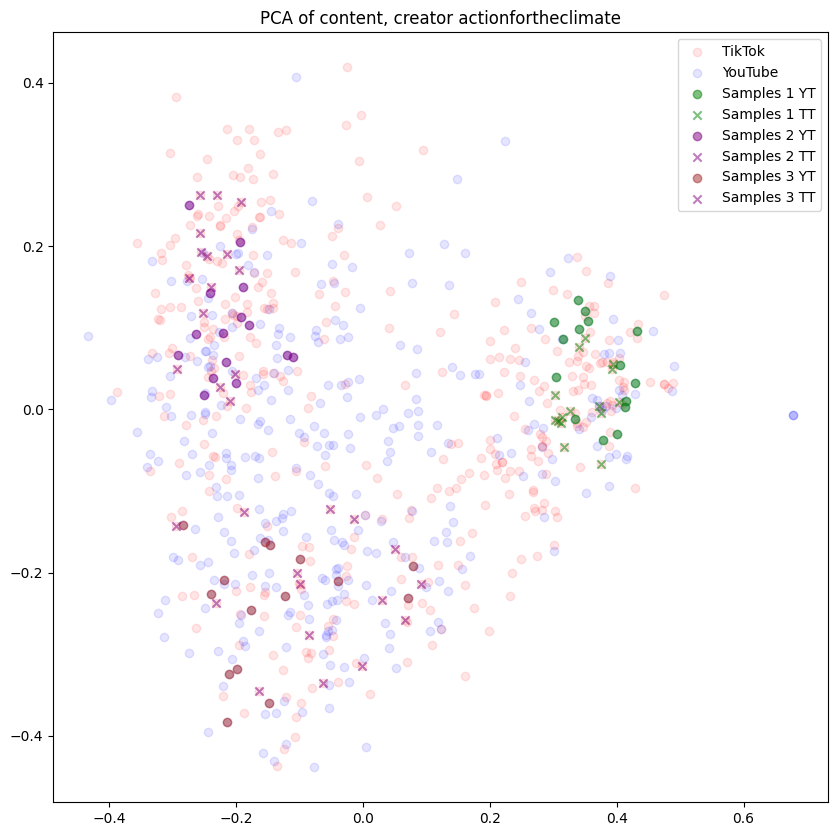

In [104]:
# creator 1

# for each creator, plot PCA
for creator in ["actionfortheclimate"]:
    # load embeddings content
    with open("./embeddings/embeddings_tt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_tt_content = pickle.load(f)

    with open("./embeddings/embeddings_yt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_yt_content = pickle.load(f)

    # load content TT all_keywords
    with open(data_dir_tt+"all_keywords_"+creator+"_2021-2023.pkl", "rb") as f:
        tt_content = pickle.load(f)
        # reset index
        tt_content.reset_index(drop=True, inplace=True)

    # load content YT all_keywords
    with open(data_dir_yt+creator+"_transcript_2021-2023.pkl", "rb") as f:
        yt_content = pickle.load(f)
        # reset index
        yt_content.reset_index(drop=True, inplace=True)

    # apply PCA to embeddings
    emb_tt_pca = pca_model.transform(embeddings_tt_content)
    emb_yt_pca = pca_model.transform(embeddings_yt_content)

    # plot PCA
    plt.figure(figsize=(10,10))
    plt.scatter(emb_tt_pca[:,0], emb_tt_pca[:,1], label="TikTok", color="red", alpha=0.1)
    plt.scatter(emb_yt_pca[:,0], emb_yt_pca[:,1], label="YouTube", color="blue", alpha=0.1)

    #sample 2 data points with PC1 around -0.2 and PC2 around 0.2
    samples1 = np.where((emb_yt_pca[:,0] > 0.3) & (emb_yt_pca[:,0] < 0.5) & (emb_yt_pca[:,1] > -0.1) & (emb_yt_pca[:,1] < 0.2))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples1 = np.random.choice(samples1, 15, replace=False)
    # extract samples from content_all_yt
    samples1_content = yt_content.iloc[samples1]
    # color samples in plot 
    plt.scatter(emb_yt_pca[samples1,0], emb_yt_pca[samples1,1], label="Samples 1 YT", color="green", alpha=0.5)

    samples1tt = np.where((emb_tt_pca[:,0] > 0.3) & (emb_tt_pca[:,0] < 0.5) & (emb_tt_pca[:,1] > -0.1) & (emb_tt_pca[:,1] < 0.2))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples1tt = np.random.choice(samples1tt, 15, replace=False)
    # extract samples from content_all_yt
    samples1_content_tt = tt_content.iloc[samples1tt]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples1tt,0], emb_tt_pca[samples1tt,1], label="Samples 1 TT", color="green", alpha=0.5, marker="x")


    # sample 2 data points with PC1 around 0.4 and PC2 around 0.05
    samples2yt = np.where((emb_yt_pca[:,0] > -0.3) & (emb_yt_pca[:,0] < -0.1) & (emb_yt_pca[:,1] > 0) & (emb_yt_pca[:,1] < 0.3))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples2yt = np.random.choice(samples2yt, 15, replace=False)
    # extract samples from content_all_yt
    samples2_content_yt = yt_content.iloc[samples2yt]
    # color samples in plot 
    plt.scatter(emb_yt_pca[samples2yt,0], emb_yt_pca[samples2yt,1], label="Samples 2 YT", color="purple", alpha=0.5)

    samples2 = np.where((emb_tt_pca[:,0] > -0.3) & (emb_tt_pca[:,0] < -0.1) & (emb_tt_pca[:,1] > 0) & (emb_tt_pca[:,1] < 0.3))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples2 = np.random.choice(samples2, 15, replace=False)
    # extract samples from content_all_yt
    samples2_content = tt_content.iloc[samples2]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples2,0], emb_tt_pca[samples2,1], label="Samples 2 TT", color="purple", alpha=0.5, marker="x")


    samples3yt = np.where((emb_yt_pca[:,0] > -0.3) & (emb_yt_pca[:,0] < 0.1) & (emb_yt_pca[:,1] > -0.4) & (emb_yt_pca[:,1] < -0.1))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples3yt = np.random.choice(samples3yt, 15, replace=False)
    # extract samples from content_all_yt
    samples3_content_yt = yt_content.iloc[samples3yt]
    # color samples in plot 
    plt.scatter(emb_yt_pca[samples3yt,0], emb_yt_pca[samples3yt,1], label="Samples 3 YT", color="brown", alpha=0.5)

    samples3 = np.where((emb_tt_pca[:,0] > -0.3) & (emb_tt_pca[:,0] < 0.1) & (emb_tt_pca[:,1] > -0.4) & (emb_tt_pca[:,1] < -0.1))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples3 = np.random.choice(samples3, 15, replace=False)
    # extract samples from content_all_yt
    samples3_content = tt_content.iloc[samples3]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples3,0], emb_tt_pca[samples3,1], label="Samples 3 TT", color="purple", alpha=0.5, marker="x")

    # title
    plt.title("PCA of content, creator "+creator)
    plt.legend()

    plt.show()

In [105]:
# print in a nice way the text of the samples
print("Samples 1 YT:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if type(samples1_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Description"])
print("")
print("Samples 1 TT:")
for i in range(len(samples1_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples1_content_tt.columns:
        if type(samples1_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples1_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples1_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples1_content_tt.iloc[i]["video_description"])

print("")
print("")
print("Samples 2 YT:")
for i in range(len(samples2_content_yt)):
    # type voice_to_text is not string
    if type(samples2_content_yt.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples2_content_yt.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples2_content_yt.iloc[i]["Video Description"])
print("")
print("Samples 2 TT:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples2_content.columns:
        if type(samples2_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples2_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])

print("")
print("")
print("Samples 3 YT:")
for i in range(len(samples3_content_yt)):
    # type voice_to_text is not string
    if type(samples3_content_yt.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples3_content_yt.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples3_content_yt.iloc[i]["Video Description"])
print("")
print("Samples 3 TT:")
for i in range(len(samples3_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples3_content.columns:
        if type(samples3_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples3_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples3_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples3_content.iloc[i]["video_description"])



Samples 1 YT:
Sample 1 : okay let me tell you what this one this.is my favorite wait wait wait this one.that's it no no hold on hold on this is.my favorite.hmm now that I think about it maybe this.is my favorite hold on hold on this one.that's my favorite.[Applause].thank you.[Applause]
Sample 2 : you know what it never was.that's serious it was never that serious
Sample 3 : boring yawning.sloppy.lazy
Sample 4 : I think I'm gonna be sick.how long how long what how long are you.planning on doing this.what all right it's true I tricked you.to get the Krabby Patty but then you.showed me friendship.and now I realize.that's all I ever really wanted.really no not really being evil is too.much fun.[Music].[Music]
Sample 5 : shredding waves is much more dangerous.than people realize you're very brave.Kevin.thank you Barbie
Sample 6 : I brought back some takeout so like.let's get down and pick out it's.Shredder
Sample 7 : that's a great question I've been.wondering that myself
Sample 8 : [Music

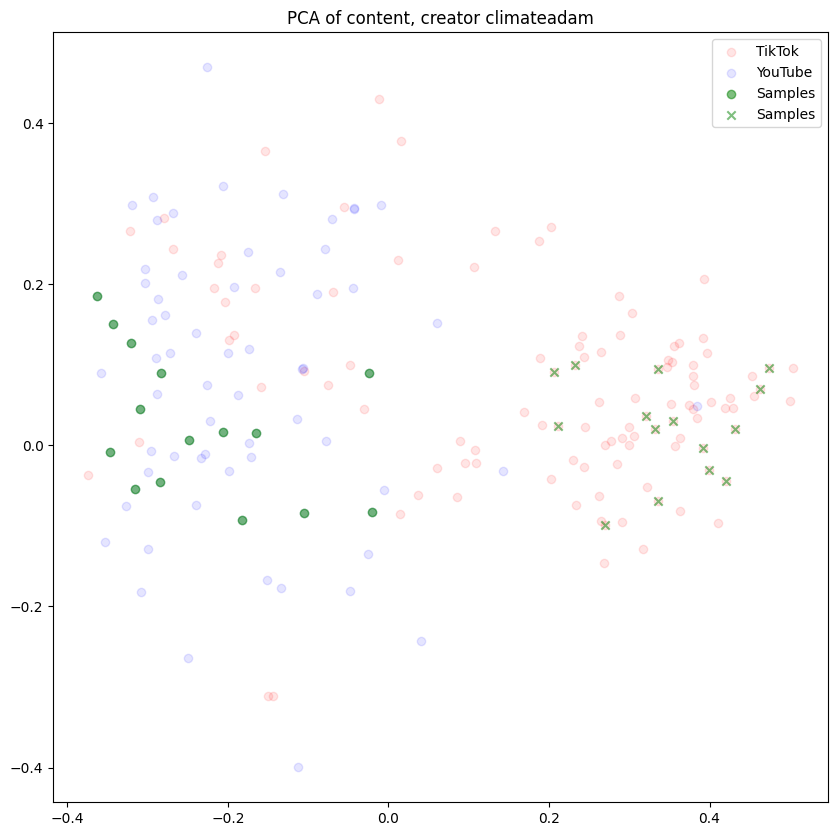

In [107]:
# creator 2

# for each creator, plot PCA
for creator in ["climateadam"]:
    # load embeddings content
    with open("./embeddings/embeddings_tt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_tt_content = pickle.load(f)

    with open("./embeddings/embeddings_yt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_yt_content = pickle.load(f)

    # load content TT all_keywords
    with open(data_dir_tt+"all_keywords_"+creator+"_2021-2023.pkl", "rb") as f:
        tt_content = pickle.load(f)
        # reset index
        tt_content.reset_index(drop=True, inplace=True)

    # load content YT all_keywords
    with open(data_dir_yt+creator+"_transcript_2021-2023.pkl", "rb") as f:
        yt_content = pickle.load(f)
        # reset index
        yt_content.reset_index(drop=True, inplace=True)

    # apply PCA to embeddings
    emb_tt_pca = pca_model.transform(embeddings_tt_content)
    emb_yt_pca = pca_model.transform(embeddings_yt_content)

    # plot PCA
    plt.figure(figsize=(10,10))
    plt.scatter(emb_tt_pca[:,0], emb_tt_pca[:,1], label="TikTok", color="red", alpha=0.1)
    plt.scatter(emb_yt_pca[:,0], emb_yt_pca[:,1], label="YouTube", color="blue", alpha=0.1)

    #sample 2 data points with PC1 around -0.2 and PC2 around 0.2
    samples1 = np.where((emb_yt_pca[:,0] > -0.4) & (emb_yt_pca[:,0] < 0) & (emb_yt_pca[:,1] > -0.1) & (emb_yt_pca[:,1] < 0.2))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples1 = np.random.choice(samples1, 15, replace=False)
    # extract samples from content_all_yt
    samples1_content = yt_content.iloc[samples1]
    # color samples in plot 
    plt.scatter(emb_yt_pca[samples1,0], emb_yt_pca[samples1,1], label="Samples", color="green", alpha=0.5)

    # sample 2 data points with PC1 around 0.4 and PC2 around 0.05
    samples2 = np.where((emb_tt_pca[:,0] > 0.2) & (emb_tt_pca[:,0] < 0.5) & (emb_tt_pca[:,1] > -0.15) & (emb_tt_pca[:,1] < 0.2))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples2 = np.random.choice(samples2, 15, replace=False)
    # extract samples from content_all_yt
    samples2_content = tt_content.iloc[samples2]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples2,0], emb_tt_pca[samples2,1], label="Samples", color="green", alpha=0.5, marker="x")

    # title
    plt.title("PCA of content, creator "+creator)
    plt.legend()

    plt.show()

In [108]:
# print in a nice way the text of the samples
print("Samples 1 YT:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if type(samples1_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples1_content.iloc[i]["Video Description"])

print("")
print("Samples 2 TT:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples2_content.columns:
        if type(samples2_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples2_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])



Samples 1 YT:
Sample 1 : today I want to talk about The Good the.Bad and the Ugly of climate change.Solutions you see we often lose our way.by overhyping technologies that just.turn out to be a lot of hot air all we.take for granted the tech that could.actually save the day so I wanted to.create the definitive tier list of.climate change solutions for what it's.worth the ipcc did already kind of do.this but mine will be more objective and.less boring I'm Adam a climate scientist.with aphd from Oxford sharing what you.need to know about climate change and.joining me this week to help out with.the tier list is Dr Rosie Barnes I'm.Rosie Birds I have a PhD in mechanical.engineering and.experience working with.working with and my YouTube channel is.on the length of it so Rosie we have to.rank everything from s which is the god.tier all the way from a to F and we're.basing this on how good things are for.decarbonizing how cost effective they.are whether they're green washing and.even whether

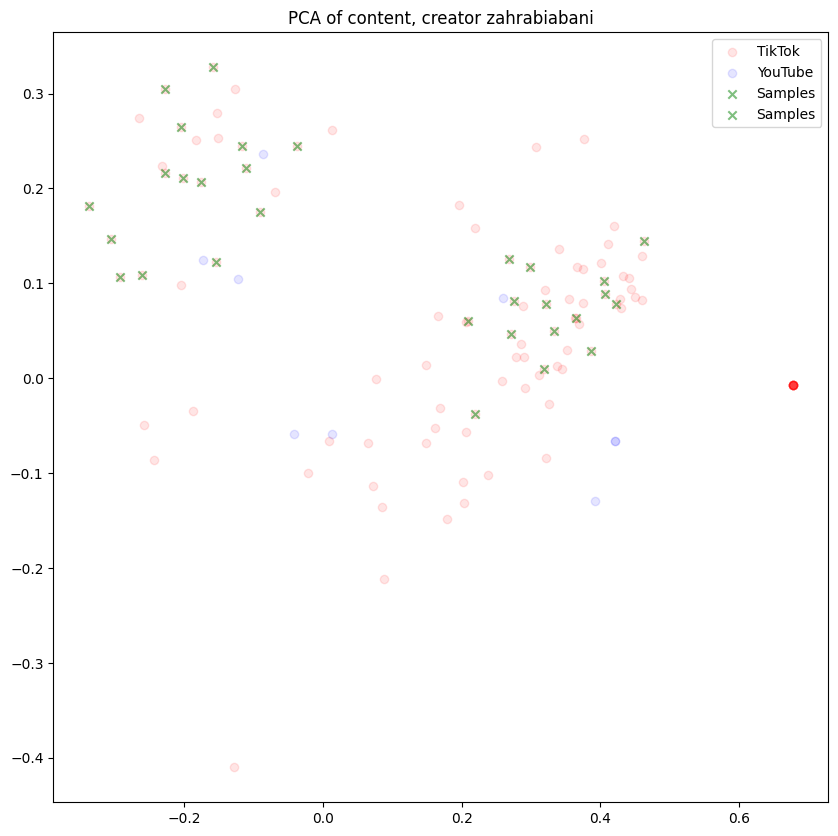

In [109]:
# creator 3

# for each creator, plot PCA
for creator in ["zahrabiabani"]:
    # load embeddings content
    with open("./embeddings/embeddings_tt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_tt_content = pickle.load(f)

    with open("./embeddings/embeddings_yt_withtrans_clean_"+creator+".pkl", "rb") as f:
        embeddings_yt_content = pickle.load(f)

    # load content TT all_keywords
    with open(data_dir_tt+"all_keywords_"+creator+"_2021-2023.pkl", "rb") as f:
        tt_content = pickle.load(f)
        # reset index
        tt_content.reset_index(drop=True, inplace=True)

    # load content YT all_keywords
    with open(data_dir_yt+creator+"_transcript_2021-2023.pkl", "rb") as f:
        yt_content = pickle.load(f)
        # reset index
        yt_content.reset_index(drop=True, inplace=True)

    # apply PCA to embeddings
    emb_tt_pca = pca_model.transform(embeddings_tt_content)
    emb_yt_pca = pca_model.transform(embeddings_yt_content)

    # plot PCA
    plt.figure(figsize=(10,10))
    plt.scatter(emb_tt_pca[:,0], emb_tt_pca[:,1], label="TikTok", color="red", alpha=0.1)
    plt.scatter(emb_yt_pca[:,0], emb_yt_pca[:,1], label="YouTube", color="blue", alpha=0.1)

    #sample 2 data points with PC1 around -0.2 and PC2 around 0.2
    samples1 = np.where((emb_tt_pca[:,0] > -0.4) & (emb_tt_pca[:,0] < 0) & (emb_tt_pca[:,1] > 0.1) & (emb_tt_pca[:,1] < 0.5))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples1 = np.random.choice(samples1, 15, replace=False)
    # extract samples from content_all_yt
    samples1_content = tt_content.iloc[samples1]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples1,0], emb_tt_pca[samples1,1], label="Samples", color="green", alpha=0.5, marker="x")

    # sample 2 data points with PC1 around 0.4 and PC2 around 0.05
    samples2 = np.where((emb_tt_pca[:,0] > 0.2) & (emb_tt_pca[:,0] < 0.5) & (emb_tt_pca[:,1] > -0.05) & (emb_tt_pca[:,1] < 0.15))[0]
    # randomly sample 2 data points
    # set seed
    np.random.seed(42)
    samples2 = np.random.choice(samples2, 15, replace=False)
    # extract samples from content_all_yt
    samples2_content = tt_content.iloc[samples2]
    # color samples in plot 
    plt.scatter(emb_tt_pca[samples2,0], emb_tt_pca[samples2,1], label="Samples", color="green", alpha=0.5, marker="x")

    # title
    plt.title("PCA of content, creator "+creator)
    plt.legend()

    plt.show()

In [110]:
# print in a nice way the text of the samples
print("Samples 1:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples1_content.columns:
        if type(samples1_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples1_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples1_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples1_content.iloc[i]["video_description"])
print("")
print("Samples 2:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples2_content.columns:
        if type(samples2_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples2_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])



Samples 1:
Sample 1 : 97% of climate scientists point to the severity of globalclimatechange but ...?
Sample 2 : let’s have this convo!! 👀 climatejustice
Sample 3 : if this is you, i created a free guide to help you through these convos!! link in bio :) climatecrisistiktok
Sample 4 : this is a joke ik climatechange is much more nuanced ..
Sample 5 : Reply to tinx two practical tips to getting involved in systemic climateaction !!!
Sample 6 : Reply to gracie.gioiosa climatechange and humantraffickingawareness … how the two relate!
Sample 7 : lmao climateaction
Sample 8 : … link in bio to free guide helping u with these convos;) climatechangeawareness
Sample 9 : ok who else climateaction
Sample 10 : pt 2 on the ipcc report - the main findings climateaction
Sample 11 : disaster amnesia … let’s combat it climateactionnow
Sample 12 : climateactionnow !!! link in bio CorollaCrossStep
Sample 13 : on some bipartisan behavior hehe climateaction
Sample 14 : i said what i said climatejustice
Samp

## UMAP

In [5]:
# apply umap to emb_all_tt and emb_all_yt

# train umap model
umap_model = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0)
# fit stacked embeddings
umap_model.fit(np.vstack((emb_all_tt, emb_all_yt)))

UMAP(min_dist=0, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [6]:
# save model
with open("./umap_model_content_newdata.pkl", "wb") as f:
    pickle.dump(umap_model, f)

/Users/arpe/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [7]:
# apply umap to embeddings
emb_all_tt_umap = umap_model.transform(emb_all_tt)
emb_all_yt_umap = umap_model.transform(emb_all_yt)

# get indices of samples with umap dimension 1 > 10 
samples_removett = np.where((emb_all_tt_umap[:,0] > 4))[0]
samples_removeyt = np.where((emb_all_yt_umap[:,0] > 4))[0]

# remove samples
emb_all_tt_umap = np.delete(emb_all_tt_umap, samples_removett, axis=0)
emb_all_yt_umap = np.delete(emb_all_yt_umap, samples_removeyt, axis=0)
# remove samples also from content dataframes
content_all_tt = content_all_tt.drop(samples_removett)
content_all_yt = content_all_yt.drop(samples_removeyt)

# compare shapes
print(emb_all_tt_umap.shape)
print(emb_all_yt_umap.shape)
print(content_all_tt.shape)
print(content_all_yt.shape)

(2515, 2)
(4200, 2)
(2515, 15)
(4200, 6)


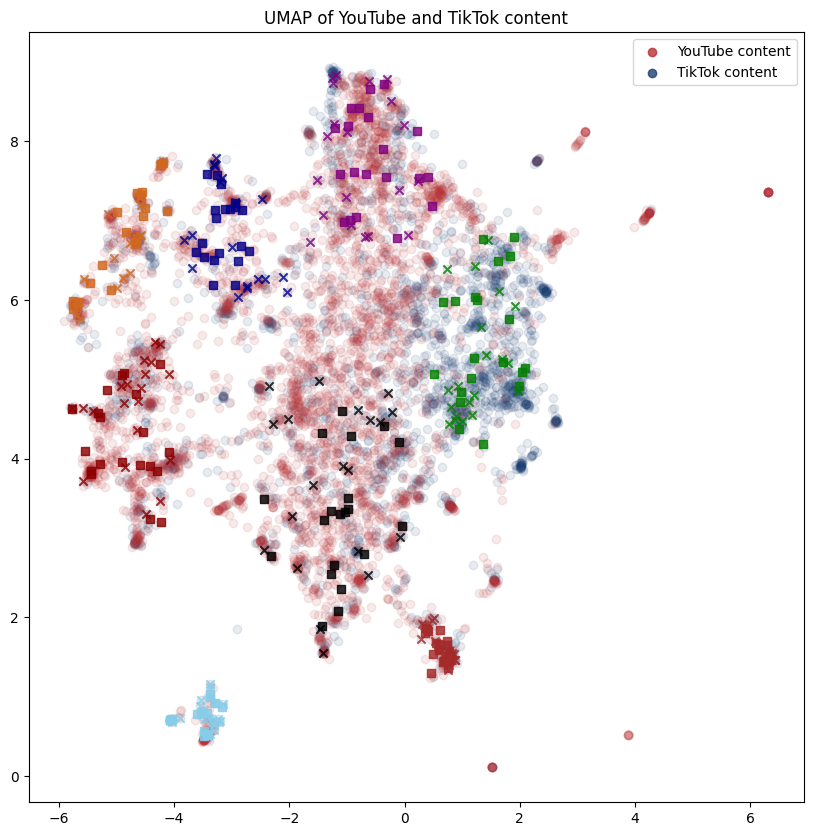

In [86]:
# plot umap
plt.figure(figsize=(10,10))
plt.scatter(emb_all_tt_umap[:,0], emb_all_tt_umap[:,1], color="#1E4174", alpha=0.1)
plt.scatter(emb_all_yt_umap[:,0], emb_all_yt_umap[:,1], color="#B93236", alpha=0.1)

#### sample 1 data 
samples1 = np.where((emb_all_tt_umap[:,0] > 0.5)&(emb_all_tt_umap[:,0] < 2.3)&(emb_all_tt_umap[:,1] > 4)&(emb_all_tt_umap[:,1] < 6.8))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples1 = np.random.choice(samples1, 20, replace=False)
# extract samples from content_all_yt
samples1_content = content_all_tt.iloc[samples1]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples1,0], emb_all_tt_umap[samples1,1], color="green", alpha=0.8, marker="x")

samples1yt = np.where((emb_all_yt_umap[:,0] > 0.5)&(emb_all_yt_umap[:,0] < 2.3)&(emb_all_yt_umap[:,1] > 4)&(emb_all_yt_umap[:,1] < 6.8))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
# if samples1yt not empty
if len(samples1yt) > 0:
    samples1yt = np.random.choice(samples1yt, 20, replace=False)
    # extract samples from content_all_yt
    samples1_content_yt = content_all_yt.iloc[samples1yt]
    # color samples in plot 
    plt.scatter(emb_all_yt_umap[samples1yt,0], emb_all_yt_umap[samples1yt,1], color="green", alpha=0.8, marker="s")

# draw circle 

#### sample 2 only TikTok
samples2 = np.where((emb_all_tt_umap[:,0] > -1.8) & (emb_all_tt_umap[:,0] < 0.5) & (emb_all_tt_umap[:,1] > 6.7))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples2 = np.random.choice(samples2, 20, replace=False)
# extract samples from content_all_yt
samples2_content = content_all_tt.iloc[samples2]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples2,0], emb_all_tt_umap[samples2,1], color="purple", alpha=0.8, marker="x")

samples2yt = np.where((emb_all_yt_umap[:,0] > -1.8) & (emb_all_yt_umap[:,0] < 0.5) & (emb_all_yt_umap[:,1] > 6.7))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples2yt = np.random.choice(samples2yt, 20, replace=False)
# extract samples from content_all_yt
samples2_content_yt = content_all_yt.iloc[samples2yt]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples2yt,0], emb_all_yt_umap[samples2yt,1], color="purple", alpha=0.8, marker="s")


#### sample 3 
samples3 = np.where((emb_all_yt_umap[:,0] > -6) & (emb_all_yt_umap[:,0] < -4) & (emb_all_yt_umap[:,1] > 3) & (emb_all_yt_umap[:,1] < 5.5))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples3 = np.random.choice(samples3, 20, replace=False)
# extract samples from content_all_yt
samples3_content = content_all_yt.iloc[samples3]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples3,0], emb_all_yt_umap[samples3,1], color="darkred", alpha=0.8, marker="s")

samples3tt = np.where((emb_all_tt_umap[:,0] > -6) & (emb_all_tt_umap[:,0] < -4) & (emb_all_tt_umap[:,1] > 3) & (emb_all_tt_umap[:,1] < 5.5))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples3tt = np.random.choice(samples3tt, 20, replace=False)
# extract samples from content_all_yt
samples3_content_tt = content_all_tt.iloc[samples3tt]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples3tt,0], emb_all_tt_umap[samples3tt,1], color="darkred", alpha=0.8, marker="x")

#### sample 4 
samples4 = np.where((emb_all_yt_umap[:,0] > -6) & (emb_all_yt_umap[:,0] < -4) & (emb_all_yt_umap[:,1] > 5.7) & (emb_all_yt_umap[:,1] < 8))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples4 = np.random.choice(samples4, 20, replace=False)
# extract samples from content_all_yt
samples4_content = content_all_yt.iloc[samples4]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples4,0], emb_all_yt_umap[samples4,1], color="chocolate", alpha=0.8, marker="s")

samples4tt = np.where((emb_all_tt_umap[:,0] > -6) & (emb_all_tt_umap[:,0] < -4) & (emb_all_tt_umap[:,1] > 5.7) & (emb_all_tt_umap[:,1] < 8))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples4tt = np.random.choice(samples4tt, 20, replace=False)
# extract samples from content_all_yt
samples4_content_tt = content_all_tt.iloc[samples4tt]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples4tt,0], emb_all_tt_umap[samples4tt,1], color="chocolate", alpha=0.8, marker="x")

#### sample 5
samples5 = np.where((emb_all_yt_umap[:,0] > -4) & (emb_all_yt_umap[:,0] < -2) & (emb_all_yt_umap[:,1] > 6) & (emb_all_yt_umap[:,1] < 8))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples5 = np.random.choice(samples5, 20, replace=False)
# extract samples from content_all_yt
samples5_content = content_all_yt.iloc[samples5]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples5,0], emb_all_yt_umap[samples5,1], color="darkblue", alpha=0.8, marker="s")

samples5tt = np.where((emb_all_tt_umap[:,0] > -4) & (emb_all_tt_umap[:,0] < -2) & (emb_all_tt_umap[:,1] > 6) & (emb_all_tt_umap[:,1] < 8))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples5tt = np.random.choice(samples5tt, 20, replace=False)
# extract samples from content_all_yt
samples5_content_tt = content_all_tt.iloc[samples5tt]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples5tt,0], emb_all_tt_umap[samples5tt,1], color="darkblue", alpha=0.8, marker="x")


#### sample 6
samples6 = np.where((emb_all_yt_umap[:,0] > -2.5) & (emb_all_yt_umap[:,0] < 0) & (emb_all_yt_umap[:,1] > 1.5) & (emb_all_yt_umap[:,1] < 5))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples6 = np.random.choice(samples6, 20, replace=False)
# extract samples from content_all_yt
samples6_content = content_all_yt.iloc[samples6]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples6,0], emb_all_yt_umap[samples6,1], color="black", alpha=0.8, marker="s")

samples6tt = np.where((emb_all_tt_umap[:,0] > -2.5) & (emb_all_tt_umap[:,0] < 0) & (emb_all_tt_umap[:,1] > 1.5) & (emb_all_tt_umap[:,1] < 5))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples6tt = np.random.choice(samples6tt, 20, replace=False)
# extract samples from content_all_yt
samples6_content_tt = content_all_tt.iloc[samples6tt]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples6tt,0], emb_all_tt_umap[samples6tt,1], color="black", alpha=0.8, marker="x")


# #### sample 7
# samples7 = np.where((emb_all_yt_umap[:,0] > -2) & (emb_all_yt_umap[:,0] < 0) & (emb_all_yt_umap[:,1] > 4) & (emb_all_yt_umap[:,1] < 7))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples7 = np.random.choice(samples7, 20, replace=False)
# # extract samples from content_all_yt
# samples7_content = content_all_yt.iloc[samples7]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples7,0], emb_all_yt_umap[samples7,1], color="yellow", alpha=0.8, marker="s")

# samples7tt = np.where((emb_all_tt_umap[:,0] > -2) & (emb_all_tt_umap[:,0] < 0) & (emb_all_tt_umap[:,1] > 4) & (emb_all_tt_umap[:,1] < 7))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples7tt = np.random.choice(samples7tt, 20, replace=False)
# # extract samples from content_all_yt
# samples7_content_tt = content_all_tt.iloc[samples7tt]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples7tt,0], emb_all_tt_umap[samples7tt,1], color="yellow", alpha=0.8, marker="x")


#### sample 8
samples8 = np.where((emb_all_yt_umap[:,0] > 0) & (emb_all_yt_umap[:,0] < 1.7) & (emb_all_yt_umap[:,1] > 1) & (emb_all_yt_umap[:,1] < 2))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples8 = np.random.choice(samples8, 20, replace=False)
# extract samples from content_all_yt
samples8_content = content_all_yt.iloc[samples8]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples8,0], emb_all_yt_umap[samples8,1], color="brown", alpha=0.8, marker="s")

samples8tt = np.where((emb_all_tt_umap[:,0] > 0) & (emb_all_tt_umap[:,0] < 1.7) & (emb_all_tt_umap[:,1] > 1) & (emb_all_tt_umap[:,1] < 2))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples8tt = np.random.choice(samples8tt, 20, replace=False)
# extract samples from content_all_yt
samples8_content_tt = content_all_tt.iloc[samples8tt]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples8tt,0], emb_all_tt_umap[samples8tt,1], color="brown", alpha=0.8, marker="x")


#### sample 9
samples9 = np.where((emb_all_yt_umap[:,0] > -4.1) & (emb_all_yt_umap[:,0] < -3) & (emb_all_yt_umap[:,1] > 0.5) & (emb_all_yt_umap[:,1] < 1.5))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples9 = np.random.choice(samples9, 20, replace=False)
# extract samples from content_all_yt
samples9_content = content_all_yt.iloc[samples9]
# color samples in plot 
plt.scatter(emb_all_yt_umap[samples9,0], emb_all_yt_umap[samples9,1], color="skyblue", alpha=0.8, marker="s")

samples9tt = np.where((emb_all_tt_umap[:,0] > -4.1) & (emb_all_tt_umap[:,0] < -3) & (emb_all_tt_umap[:,1] > 0.5) & (emb_all_tt_umap[:,1] < 1.5))[0]
# randomly sample 2 data points
# set seed
np.random.seed(42)
samples9tt = np.random.choice(samples9tt, 20, replace=False)
# extract samples from content_all_yt
samples9_content_tt = content_all_tt.iloc[samples9tt]
# color samples in plot 
plt.scatter(emb_all_tt_umap[samples9tt,0], emb_all_tt_umap[samples9tt,1], color="skyblue", alpha=0.8, marker="x")

# legend
plt.scatter([], [], label="YouTube content", color="#B93236", marker="o", alpha=0.8)
plt.scatter([], [], label="TikTok content", color="#1E4174", marker="o", alpha=0.8)
# plt.scatter([], [], label="TikTok samples", color="black", marker="x")
# plt.scatter([], [], label="YouTube samples", color="black", marker="s")
# title
plt.title("UMAP of YouTube and TikTok content")

plt.legend()
plt.show()

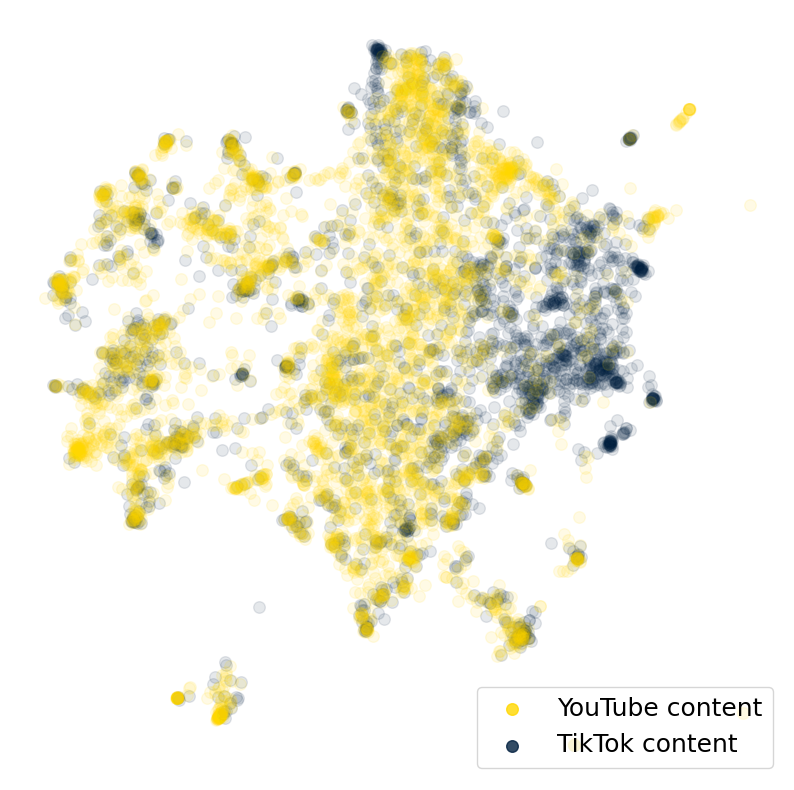

In [8]:
# plot umap
plt.figure(figsize=(10,10))
plt.scatter(emb_all_tt_umap[:,0], emb_all_tt_umap[:,1], color="#001f3f", alpha=0.1, s=70)
plt.scatter(emb_all_yt_umap[:,0], emb_all_yt_umap[:,1], color="#ffd700", alpha=0.1, s=70)

# #### sample 1 data 
# samples1 = np.where((emb_all_tt_umap[:,0] > 13)&(emb_all_tt_umap[:,1] > 6)&(emb_all_tt_umap[:,1] < 10))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples1 = np.random.choice(samples1, 20, replace=False)
# # extract samples from content_all_yt
# samples1_content = content_all_tt.iloc[samples1]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples1,0], emb_all_tt_umap[samples1,1], color="green", alpha=0.8, marker="x")

# samples1yt = np.where((emb_all_yt_umap[:,0] > 13)&(emb_all_yt_umap[:,1] > 6)&(emb_all_yt_umap[:,1] < 10))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples1yt = np.random.choice(samples1yt, 20, replace=False)
# # extract samples from content_all_yt
# samples1_content_yt = content_all_yt.iloc[samples1yt]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples1yt,0], emb_all_yt_umap[samples1yt,1], color="green", alpha=0.8, marker="s")

# # draw circle 

# #### sample 2 only TikTok
# samples2 = np.where((emb_all_tt_umap[:,0] > 5.9) & (emb_all_tt_umap[:,0] < 8) & (emb_all_tt_umap[:,1] > 8) & (emb_all_tt_umap[:,1] < 10))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples2 = np.random.choice(samples2, 20, replace=False)
# # extract samples from content_all_yt
# samples2_content = content_all_tt.iloc[samples2]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples2,0], emb_all_tt_umap[samples2,1], color="purple", alpha=0.8, marker="x")

# samples2yt = np.where((emb_all_yt_umap[:,0] > 5.9) & (emb_all_yt_umap[:,0] < 8) & (emb_all_yt_umap[:,1] > 8) & (emb_all_yt_umap[:,1] < 10))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples2yt = np.random.choice(samples2yt, 20, replace=False)
# # extract samples from content_all_yt
# samples2_content_yt = content_all_yt.iloc[samples2yt]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples2yt,0], emb_all_yt_umap[samples2yt,1], color="purple", alpha=0.8, marker="s")


# #### sample 3 
# samples3 = np.where((emb_all_yt_umap[:,0] > 10) & (emb_all_yt_umap[:,0] < 13) & (emb_all_yt_umap[:,1] > 4.5) & (emb_all_yt_umap[:,1] < 7.5))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples3 = np.random.choice(samples3, 20, replace=False)
# # extract samples from content_all_yt
# samples3_content = content_all_yt.iloc[samples3]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples3,0], emb_all_yt_umap[samples3,1], color="darkred", alpha=0.8, marker="s")

# samples3tt = np.where((emb_all_tt_umap[:,0] > 10) & (emb_all_tt_umap[:,0] < 13) & (emb_all_tt_umap[:,1] > 4.5) & (emb_all_tt_umap[:,1] < 7.5))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples3tt = np.random.choice(samples3tt, 20, replace=False)
# # extract samples from content_all_yt
# samples3_content_tt = content_all_tt.iloc[samples3tt]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples3tt,0], emb_all_tt_umap[samples3tt,1], color="darkred", alpha=0.8, marker="x")

# #### sample 4 
# samples4 = np.where((emb_all_yt_umap[:,0] > 7) & (emb_all_yt_umap[:,0] < 10) & (emb_all_yt_umap[:,1] > 4.5) & (emb_all_yt_umap[:,1] < 7))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples4 = np.random.choice(samples4, 20, replace=False)
# # extract samples from content_all_yt
# samples4_content = content_all_yt.iloc[samples4]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples4,0], emb_all_yt_umap[samples4,1], color="chocolate", alpha=0.8, marker="s")

# samples4tt = np.where((emb_all_tt_umap[:,0] > 7) & (emb_all_tt_umap[:,0] < 10) & (emb_all_tt_umap[:,1] > 4.5) & (emb_all_tt_umap[:,1] < 7))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples4tt = np.random.choice(samples4tt, 20, replace=False)
# # extract samples from content_all_yt
# samples4_content_tt = content_all_tt.iloc[samples4tt]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples4tt,0], emb_all_tt_umap[samples4tt,1], color="chocolate", alpha=0.8, marker="x")

# #### sample 5
# samples5 = np.where((emb_all_yt_umap[:,0] > 9.5) & (emb_all_yt_umap[:,0] < 12.5) & (emb_all_yt_umap[:,1] > 8) & (emb_all_yt_umap[:,1] < 11))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples5 = np.random.choice(samples5, 20, replace=False)
# # extract samples from content_all_yt
# samples5_content = content_all_yt.iloc[samples5]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples5,0], emb_all_yt_umap[samples5,1], color="darkblue", alpha=0.8, marker="s")

# samples5tt = np.where((emb_all_tt_umap[:,0] > 9.5) & (emb_all_tt_umap[:,0] < 12.5) & (emb_all_tt_umap[:,1] > 8) & (emb_all_tt_umap[:,1] < 11))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples5tt = np.random.choice(samples5tt, 20, replace=False)
# # extract samples from content_all_yt
# samples5_content_tt = content_all_tt.iloc[samples5tt]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples5tt,0], emb_all_tt_umap[samples5tt,1], color="darkblue", alpha=0.8, marker="x")


# #### sample 6
# samples6 = np.where((emb_all_yt_umap[:,0] > 7) & (emb_all_yt_umap[:,0] < 9) & (emb_all_yt_umap[:,1] > 10.5) & (emb_all_yt_umap[:,1] < 12))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples6 = np.random.choice(samples6, 20, replace=False)
# # extract samples from content_all_yt
# samples6_content = content_all_yt.iloc[samples6]
# # color samples in plot 
# plt.scatter(emb_all_yt_umap[samples6,0], emb_all_yt_umap[samples6,1], color="black", alpha=0.8, marker="s")

# samples6tt = np.where((emb_all_tt_umap[:,0] > 7) & (emb_all_tt_umap[:,0] < 9) & (emb_all_tt_umap[:,1] > 10.5) & (emb_all_tt_umap[:,1] < 12))[0]
# # randomly sample 2 data points
# # set seed
# np.random.seed(42)
# samples6tt = np.random.choice(samples6tt, 20, replace=False)
# # extract samples from content_all_yt
# samples6_content_tt = content_all_tt.iloc[samples6tt]
# # color samples in plot 
# plt.scatter(emb_all_tt_umap[samples6tt,0], emb_all_tt_umap[samples6tt,1], color="black", alpha=0.8, marker="x")

# name x and y axis
plt.xlabel("UMAP dimension 1", fontsize=16)
plt.ylabel("UMAP dimension 2", fontsize=16)

# legend
plt.scatter([], [], label="YouTube content", color="#ffd700", marker="o", alpha=0.8, s=70)
plt.scatter([], [], label="TikTok content", color="#001f3f", marker="o", alpha=0.8, s=70)
# plt.scatter([], [], label="TikTok samples", color="black", marker="x")
# plt.scatter([], [], label="YouTube samples", color="black", marker="s")
# title
#plt.title("UMAP of YouTube and TikTok content")

# get rid of axis and axis labels
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel("")

# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.legend(fontsize=18, loc="lower right")
#plt.show()

# save as svg
plt.savefig("./umap_content_original.svg", format="svg")

In [87]:
# print in a nice way the text of the samples
print("Samples 1 TT:")
for i in range(len(samples1_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples2_content.columns:
        print("Sample", i+1, ":", samples1_content.iloc[i]["video_description"])
    else:
        print("no voice_to_text")
print("")
print("Samples 1 YT:")
for i in range(len(samples1_content_yt)):
    # type voice_to_text is not string
    print("Sample", i+1, ":", samples1_content_yt.iloc[i]["Video Description"])

print("")
print("Samples 2 TT:")
for i in range(len(samples2_content)):
    # type voice_to_text is not string
    if "voice_to_text" in samples2_content.columns:
        if type(samples2_content.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples2_content.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples2_content.iloc[i]["video_description"])

print("")

print("Samples 2 YT:")
for i in range(len(samples2_content_yt)):
    # type voice_to_text is not string
    if type(samples2_content_yt.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples2_content_yt.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples2_content_yt.iloc[i]["Video Description"])

print("")

print("Samples 3 YT:")
for i in range(len(samples3_content)):
    # type voice_to_text is not string
    if type(samples3_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples3_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples3_content.iloc[i]["Video Description"])

print("")

print("Samples 3 TT:")
for i in range(len(samples3_content_tt)):
    if "voice_to_text" in samples3_content_tt.columns:
        if type(samples3_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples3_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples3_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples3_content_tt.iloc[i]["video_description"])


print("")

print("Samples 4 YT:")
for i in range(len(samples4_content)):
    # type voice_to_text is not string
    if type(samples4_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples4_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples4_content.iloc[i]["Video Description"])

print("")
print("Samples 4 TT:")
for i in range(len(samples4_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples4_content_tt.columns:
        if type(samples4_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples4_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples4_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples4_content_tt.iloc[i]["video_description"])

print("")
print("Samples 5 YT:")
for i in range(len(samples5_content)):
    # type voice_to_text is not string
    if type(samples5_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples5_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples5_content.iloc[i]["Video Description"])

print("")
print("Samples 5 TT:")
for i in range(len(samples5_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples5_content_tt.columns:
        if type(samples5_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples5_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples5_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples5_content_tt.iloc[i]["video_description"])
        
print("")
print("Samples 6 YT:")
for i in range(len(samples6_content)):
    # type voice_to_text is not string
    if type(samples6_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples6_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples6_content.iloc[i]["Video Description"])

print("")
print("Samples 6 TT:")
for i in range(len(samples6_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples6_content_tt.columns:
        if type(samples6_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples6_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples6_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples6_content_tt.iloc[i]["video_description"])


print("")
print("Samples 7 YT:")
for i in range(len(samples7_content)):
    # type voice_to_text is not string
    if type(samples7_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples7_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples7_content.iloc[i]["Video Description"])

print("")
print("Samples 7 TT:")
for i in range(len(samples7_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples7_content_tt.columns:
        if type(samples7_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples7_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples7_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples7_content_tt.iloc[i]["video_description"])


print("")
print("Samples 8 YT:")
for i in range(len(samples8_content)):
    # type voice_to_text is not string
    if type(samples8_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples8_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples8_content.iloc[i]["Video Description"])

print("")
print("Samples 8 TT:")
for i in range(len(samples8_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples8_content_tt.columns:
        if type(samples8_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples8_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples8_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples8_content_tt.iloc[i]["video_description"])

print("")
print("Samples 9 YT:")
for i in range(len(samples9_content)):
    # type voice_to_text is not string
    if type(samples9_content.iloc[i]["Video Transcript"]) == str:
        print("Sample", i+1, ":", samples9_content.iloc[i]["Video Transcript"])
    else:
        print("Sample", i+1, ":", samples9_content.iloc[i]["Video Description"])

print("")
print("Samples 9 TT:")
for i in range(len(samples9_content_tt)):
    # type voice_to_text is not string
    if "voice_to_text" in samples9_content_tt.columns:
        if type(samples9_content_tt.iloc[i]["voice_to_text"]) == str:
            print("Sample", i+1, ":", samples9_content_tt.iloc[i]["voice_to_text"])
        else:
            print("Sample", i+1, ":", samples9_content_tt.iloc[i]["video_description"])
    else:
        print("Sample", i+1, ":", samples9_content_tt.iloc[i]["video_description"])

Samples 1 TT:
Sample 1 : This WorldCleanupDay on 17th September, get out there and remove some plastic threats in your environment 💙 climateaction
Sample 2 : Okay, you caught us! But the mission remains the same!
Sample 3 : Answer im_siowei can you guys help us make positive climate news go viral in 2022?🧐 climatechange
Sample 4 : “Shush.” 🤫 Climate
Sample 5 : Bring some positive climate news into your life with Pique😏🌳❤️ climatechange
Sample 6 : The perfect soundtrack to fighting the climate crisis climatechange
Sample 7 : It's the double standards for me.
Sample 8 : That's what we climate scientists call a sweet a$$ freebie!
Sample 9 : :) you’re not alone!
Sample 10 : Join us in demanding your governor declare a climate emergency by participating in our NowOrNever campaign at the link in bio!
Sample 11 : Extreme weather events are only going to get bigger and badder. We need equitable climate action now!
Sample 12 : stitch with colinjashby accch climatechange
Sample 13 : Be better th

Try HDBSCAN

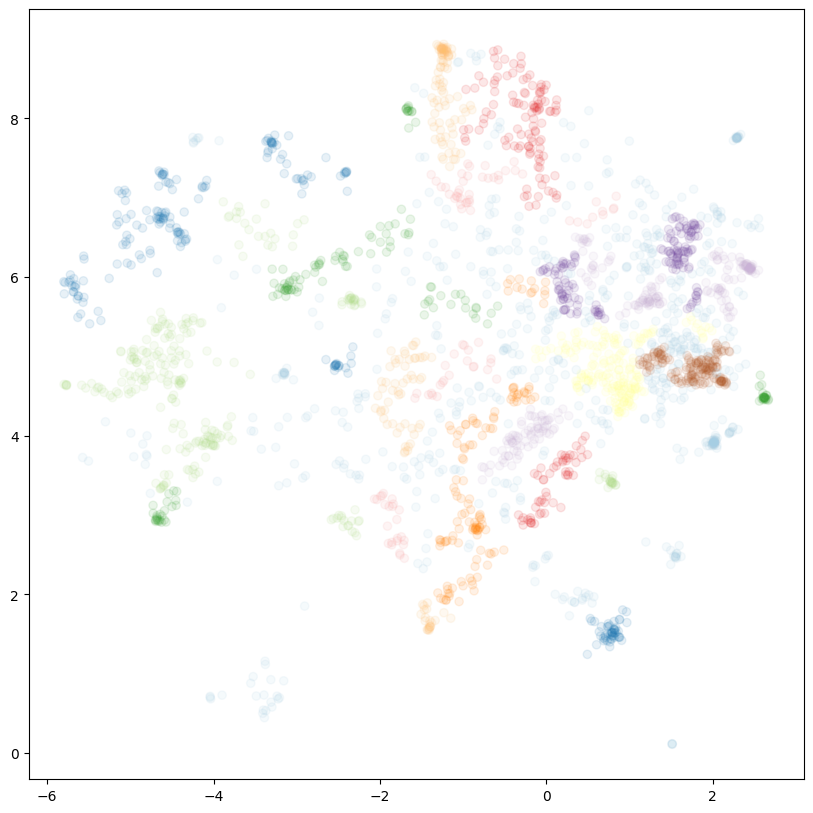

In [11]:
# hdbscan on the umap embeddings
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1)
clusterer.fit(emb_all_tt_umap)
# plot clusters
plt.figure(figsize=(10,10))
plt.scatter(emb_all_tt_umap[:,0], emb_all_tt_umap[:,1], c=clusterer.labels_, cmap="Paired", alpha=0.1)
plt.show()

Clustering

In [12]:
# stack umap embeddings before clustering
emb_all_umap = np.vstack((emb_all_tt_umap, emb_all_yt_umap))

In [14]:
# optimal search of min_cluster_size and min_samples

def extensive_search_params(param_dist, train_clusterable_embedding):
    
    scores = []
    # run extensive search over all possible combinations of parameters
    
    for min_sample in param_dist["min_samples"]:
        for min_clust_size in param_dist["min_cluster_size"]:
            for metric_type in param_dist["metric"]:

                clusterer = hdbscan.HDBSCAN(min_cluster_size=min_clust_size, min_samples=min_sample, cluster_selection_method='eom', metric=metric_type, gen_min_span_tree=True)

                # Fit the data to the clusterer
                cluster_labels = clusterer.fit_predict(train_clusterable_embedding)

                print("min sample:", min_sample, "|",
                "min cluster size:", min_clust_size, "|",
                "metric", metric_type, "|",
                "validity:", clusterer.relative_validity_, flush=True)
                
                # porint number of clusters
                print("Number of clusters:", len(set(cluster_labels)))
                
                scores.append([min_sample, min_clust_size, metric_type, clusterer.relative_validity_])
                
    max_score = max(map(lambda x: x[3], scores))
    
    list_best = [x for x in scores if x[3]==max_score][0]
    
    return list_best[0], list_best[1], list_best[2]



In [15]:
param_dist = {'min_samples': [2,5,10,15,20,3],
              'min_cluster_size':[15,20,30,40,50,60,70,80],
              'metric':["euclidean", "manhattan"]}

best_min_sample, best_min_cluster_size, best_metric = extensive_search_params(param_dist, emb_all_umap)

print(best_min_sample, best_min_cluster_size, best_metric)


min sample: 2 | min cluster size: 15 | metric euclidean | validity: 0.2224922410414645
Number of clusters: 136
min sample: 2 | min cluster size: 15 | metric manhattan | validity: 0.25493364941371083
Number of clusters: 139
min sample: 2 | min cluster size: 20 | metric euclidean | validity: 0.19401558907751737
Number of clusters: 100
min sample: 2 | min cluster size: 20 | metric manhattan | validity: 0.25973898839032766
Number of clusters: 102
min sample: 2 | min cluster size: 30 | metric euclidean | validity: 0.25919163201995987
Number of clusters: 65
min sample: 2 | min cluster size: 30 | metric manhattan | validity: 0.23302299216353237
Number of clusters: 62
min sample: 2 | min cluster size: 40 | metric euclidean | validity: 0.2540380316014664
Number of clusters: 51
min sample: 2 | min cluster size: 40 | metric manhattan | validity: 0.17896475806124734
Number of clusters: 48
min sample: 2 | min cluster size: 50 | metric euclidean | validity: 0.08810972122197966
Number of clusters: 18

Number of clusters: 37
Number of outliers: 2280


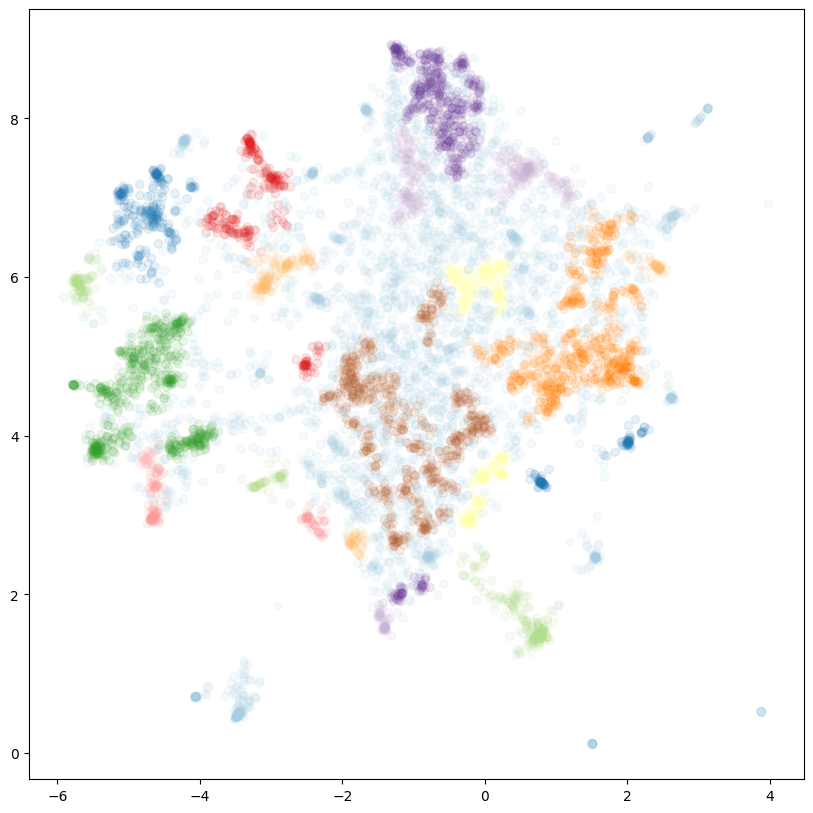

In [25]:
# HDBSCAN on the umap embeddings    
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=10, cluster_selection_method='eom', metric="euclidean")
clusterer.fit(emb_all_umap)
# plot clusters
plt.figure(figsize=(10,10))
plt.scatter(emb_all_umap[:,0], emb_all_umap[:,1], c=clusterer.labels_, cmap="Paired", alpha=0.1)
# how many clusters
print("Number of clusters:", len(set(clusterer.labels_)))
# how many -1 (outliers)
print("Number of outliers:", len(np.where(clusterer.labels_ == -1)[0]))
# add legend with cluster number
for i in range(len(set(clusterer.labels_))):
    plt.scatter([], [], label="Cluster "+str(i), color=plt.cm.Paired(i/len(set(clusterer.labels_))), alpha=0.8)

# # for each cluster, draw a circle around the centroid
# for i in range(len(set(clusterer.labels_))):
#     # get cluster
#     cluster = np.where(clusterer.labels_ == i)[0]
#     # get centroid
#     centroid = np.mean(emb_all_umap[cluster], axis=0)
#     # get radius
#     radius = np.max(np.linalg.norm(emb_all_umap[cluster] - centroid, axis=1))
#     # draw circle
#     circle = plt.Circle((centroid[0], centroid[1]), radius, color=plt.cm.Paired(i/len(set(clusterer.labels_))), alpha=0.2)
#     plt.gca().add_artist(circle)

#plt.legend()
plt.show()
